In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Загрузка файлов

In [215]:
path ='test.csv'


In [216]:
#!head -n 5 $path

In [217]:
df_test = pd.read_csv('test.csv', index_col = ['Id'])
df_train = pd.read_csv('train.csv', index_col = ['Id'])
df_sample = pd.read_csv('sample_submission.csv')

In [218]:
df_test['train_test'] = 'test'
df_train['train_test'] = 'train'

In [219]:
df = pd.concat([df_train, df_test], axis = 0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train_test
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train


In [220]:
df['LotFrontage'].std()

23.34490470692737

In [221]:
df['GarageType'].value_counts()

Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

# Corr matrix

In [254]:
corr_matrix = df.corr()
corr_matrix.nlargest(10, 'SalePrice')[['SalePrice']]

,SalePrice
SalePrice,1.000000
OverallQual,0.798713
GrLivArea,0.681928
GarageCars,0.646914
GarageArea,0.629560
TotalBsmtSF,0.594516
1stFlrSF,0.586195
FullBath,0.548339
YearBuilt,0.537133
YearRemodAdd,0.524969


<AxesSubplot:>

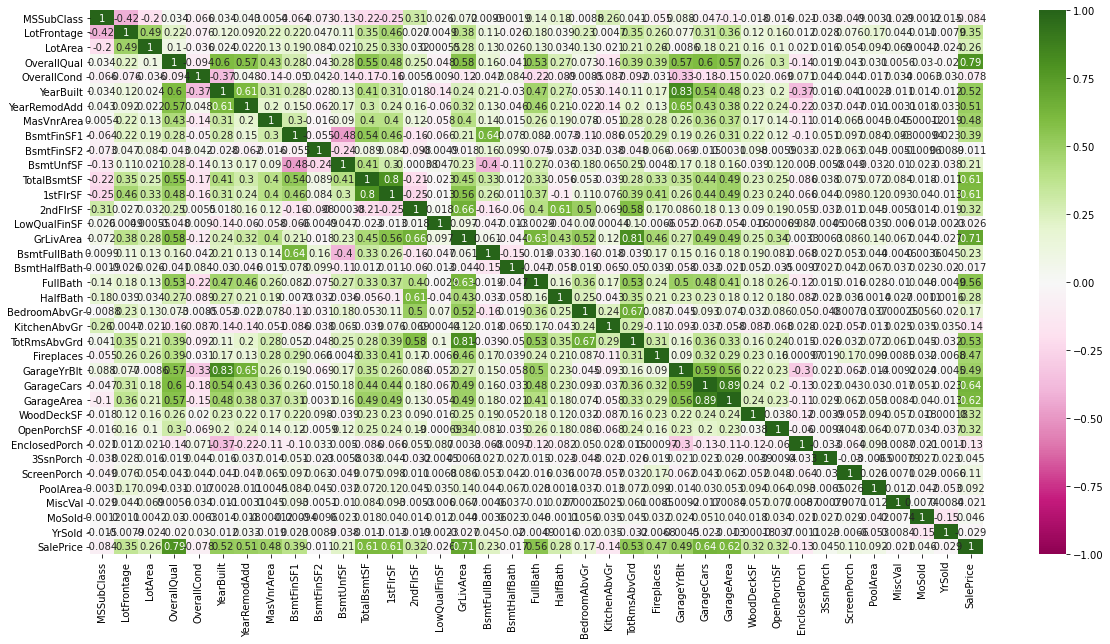

In [223]:
figl, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap="PiYG", vmax=1, vmin=-1)

# features

In [224]:
features = [#'Id',  
            'LotFrontage', 
            #'LotArea',  
            'YearBuilt', 
            'YearRemodAdd',
            'MasVnrArea', #Masonry veneer area in square feet 
            'BsmtFinSF1', 
            #'BsmtFinSF2', 
            'BsmtUnfSF', 
            'TotalBsmtSF', 
            '1stFlrSF', 
            '2ndFlrSF',
            #'LowQualFinSF', 
            'GrLivArea', 
            'BsmtFullBath', 
            'BsmtHalfBath', 
            'FullBath',
            'HalfBath', 
            'BedroomAbvGr', 
            'KitchenAbvGr',
            'TotRmsAbvGrd', 
            'Fireplaces',
            #'GarageYrBlt',
            'GarageCars', 
            'GarageArea',
            #'WoodDeckSF', 
            'OpenPorchSF',
            #'EnclosedPorch', 
            #'3SsnPorch', 
            #'ScreenPorch', 
            #'PoolArea', 
            #'MiscVal', 
            #'MoSold', 
            #'YrSold', 
            #*cat_enc_cols
]

features_drop = ['WoodDeckSF',
                'GarageYrBlt',
                'LowQualFinSF',
                'BsmtFinSF2',
                'LotArea',
                'EnclosedPorch', 
                '3SsnPorch', 
                'ScreenPorch', 
                'PoolArea', 
                'MiscVal', 
                'MoSold', 
                'YrSold', 
                'Street',
                'Utilities',
                'HeatingQC',
                'FireplaceQu',
                'PoolQC',
                'Fence', 
                'MiscFeature', 
                'OverallCond',
                'MSSubClass' 
                 
            ]

cat_features = ['MSZoning',
            #'Street',
            'Alley', 
            'LotShape', 
            'LandContour', 
            #'Utilities', 
            'LotConfig',
            'LandSlope', 
            'Neighborhood', 
            'Condition1', 
            'Condition2',
            'GarageQual',
            'BldgType',
            'HouseStyle', 
            'RoofStyle', 
            'RoofMatl', 
            'Exterior1st', 
            'Exterior2nd', 
            'MasVnrType',
            'ExterQual', 
            'ExterCond', 
            'Foundation', 
            'BsmtQual',
            'BsmtCond', 
            'BsmtExposure', 
            'BsmtFinType1',
            'BsmtFinType2',
            'Heating',
            #'HeatingQC', 
            'CentralAir', 
            'Electrical', 
            'KitchenQual',
            'Functional',
            #'FireplaceQu', 
            'GarageType',
            'GarageFinish', 
            'GarageCond', 
            'PavedDrive', 
            #'PoolQC',
            #'Fence', 
            #'MiscFeature', 
            'SaleType',
            'SaleCondition',
            'OverallQual', 
            #'OverallCond',
            #'MSSubClass'
               ]
            
tr_te = 'train_test'          
target = 'SalePrice'

In [225]:
for i in cat_features:
    print(df[i].value_counts())
    print()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

Grvl    120
Pave     78
Name: Alley, dtype: int64

Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64

Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
Pos

# Исследование данных

In [226]:
#характеристики цен
df[df['train_test'] =='train']['SalePrice'].describe().round()

count      1460.0
mean     180921.0
std       79443.0
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64

MSZoning


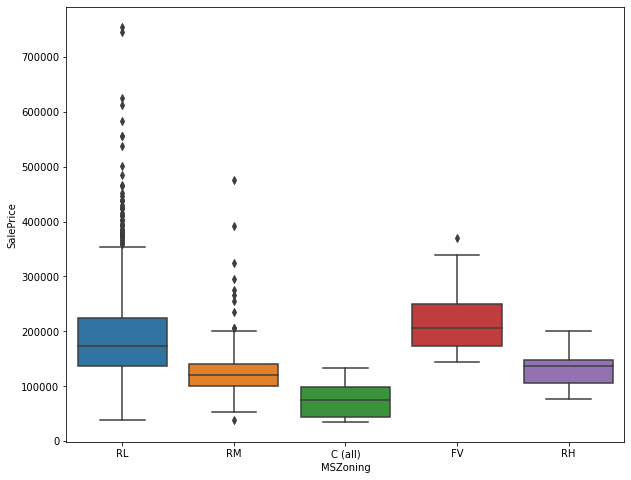


Alley


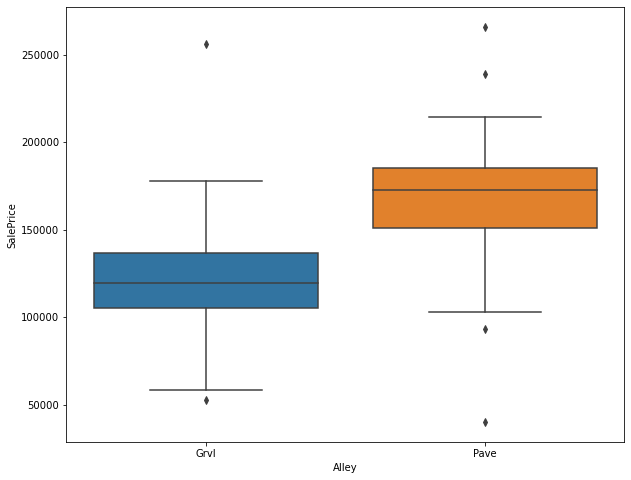


LotShape


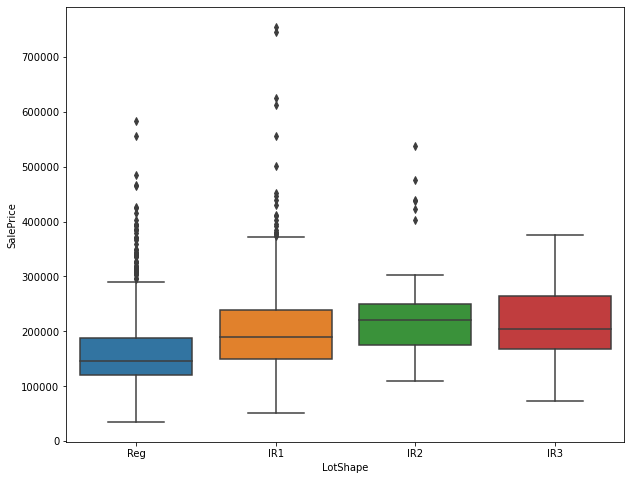


LandContour


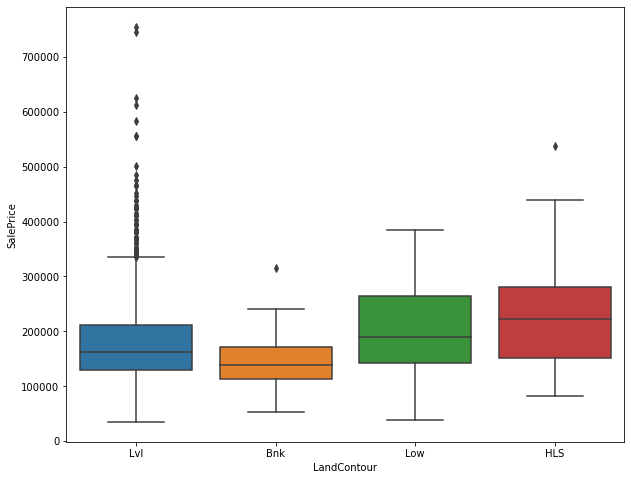


LotConfig


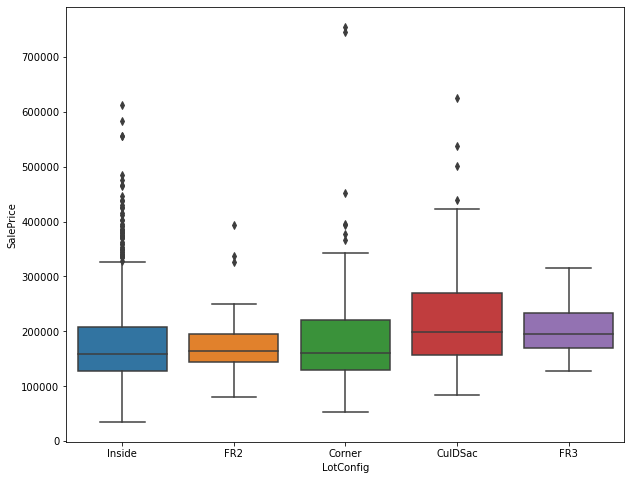


LandSlope


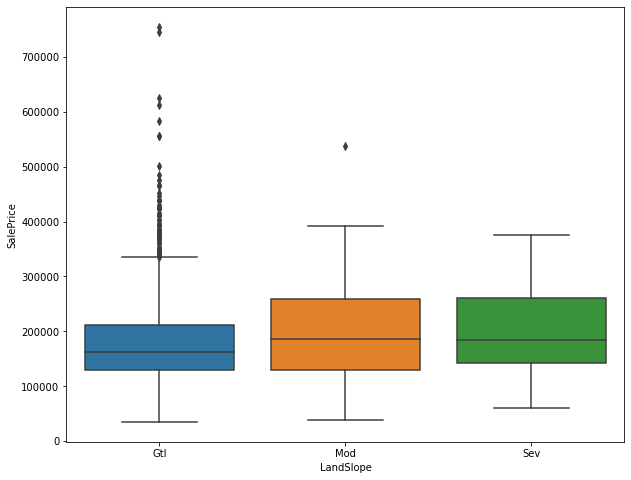


Neighborhood


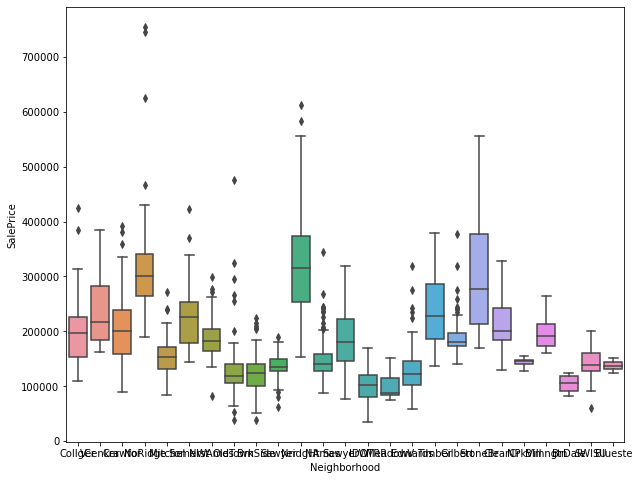


Condition1


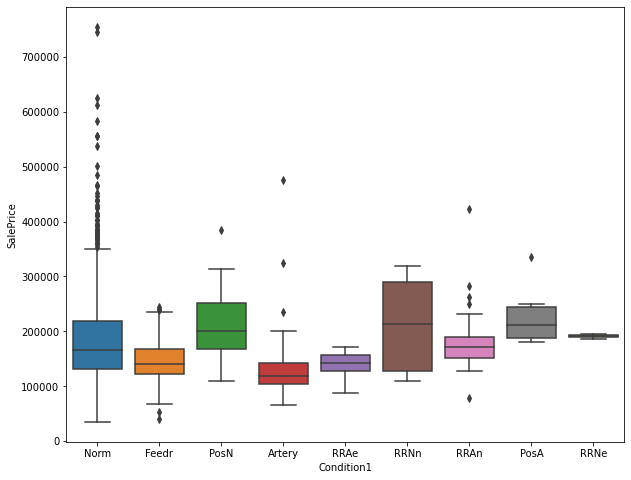


Condition2


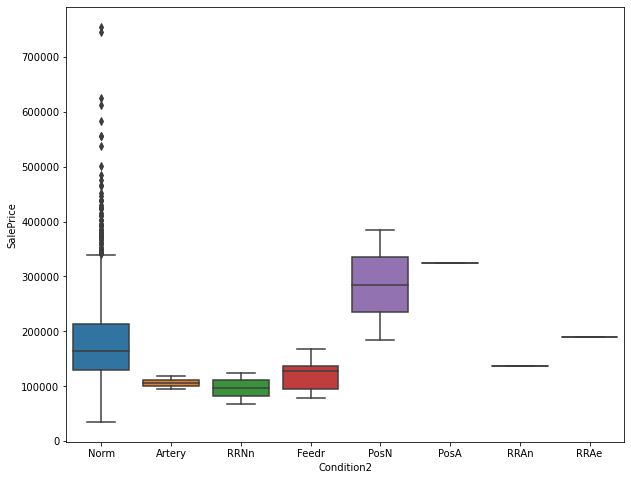


GarageQual


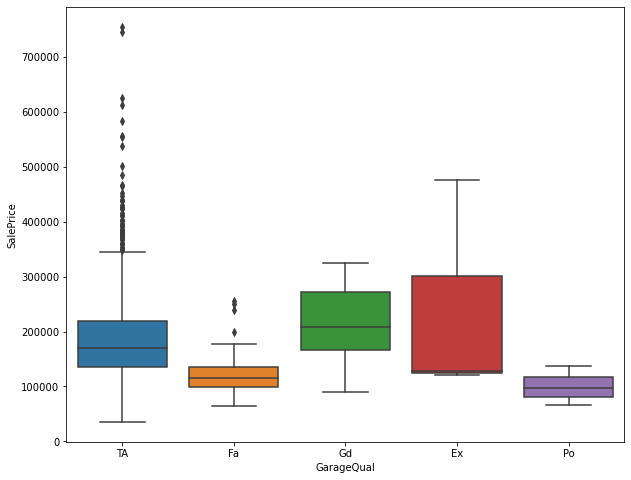


BldgType


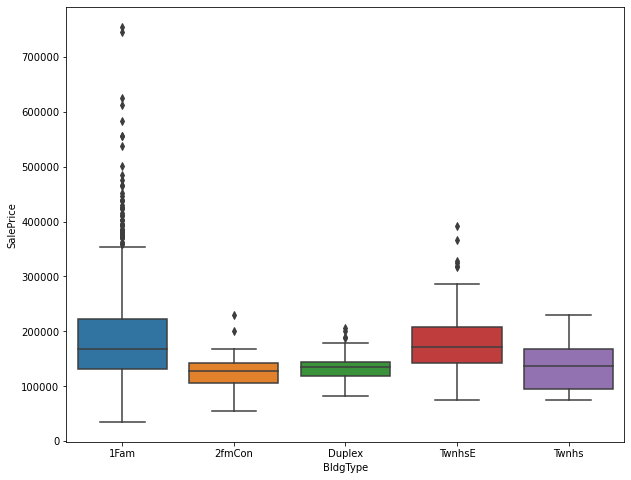


HouseStyle


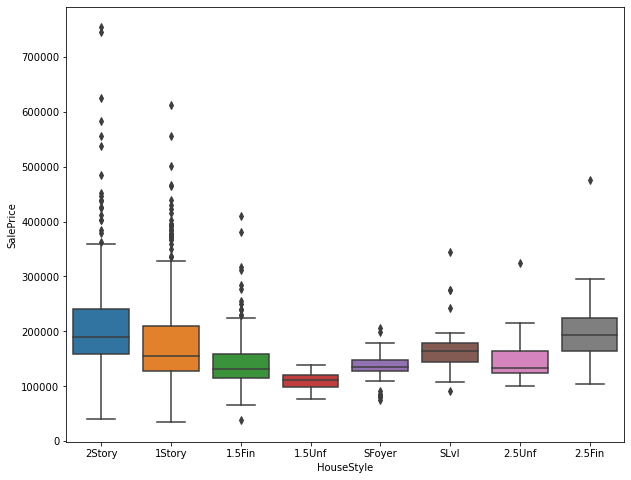


RoofStyle


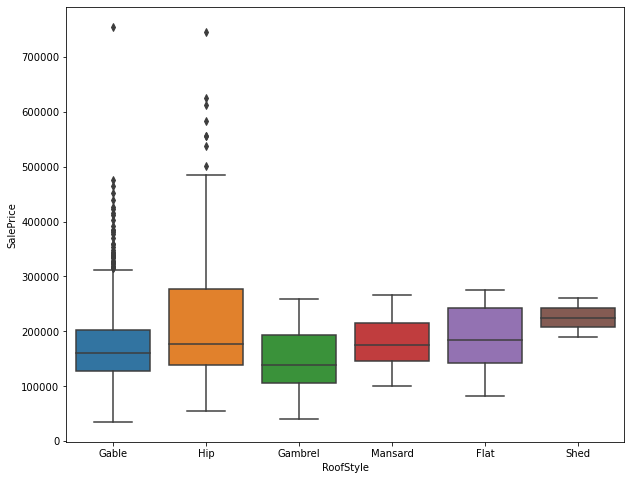


RoofMatl


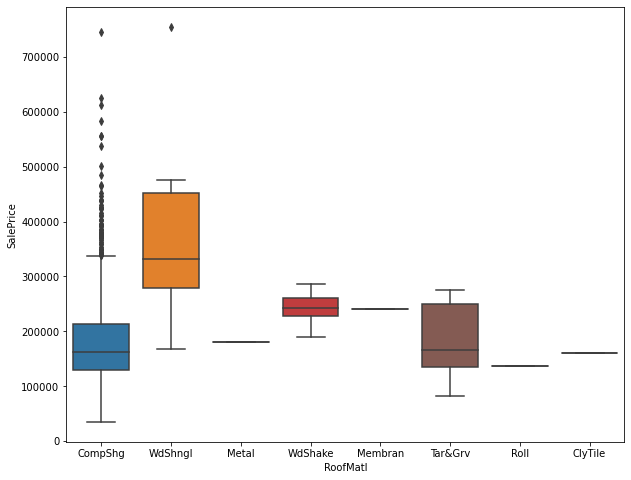


Exterior1st


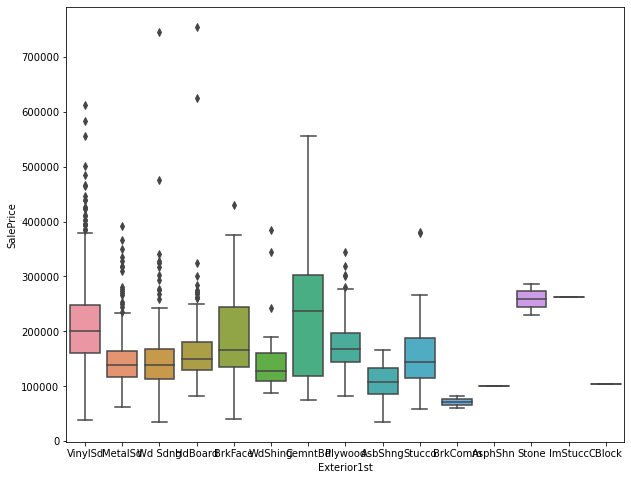


Exterior2nd


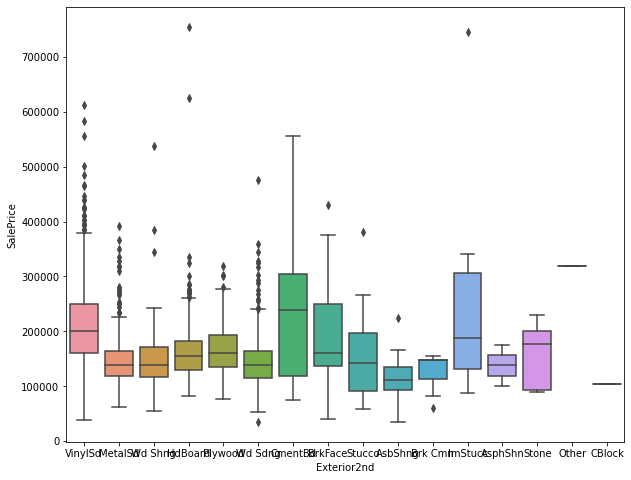


MasVnrType


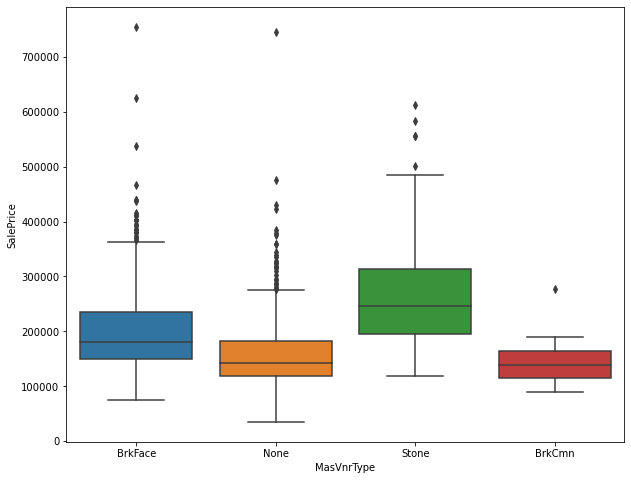


ExterQual


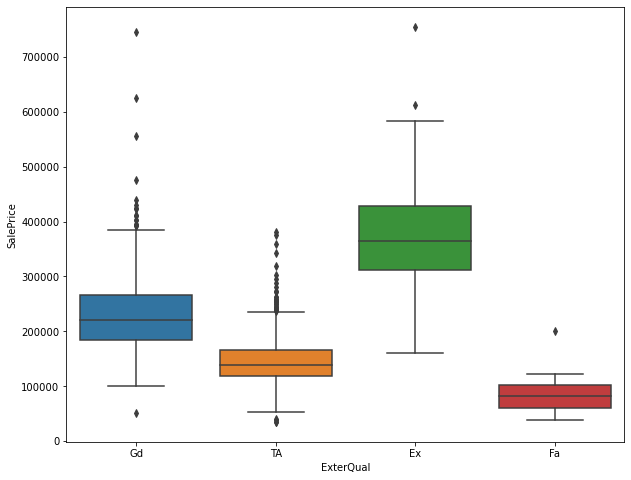


ExterCond


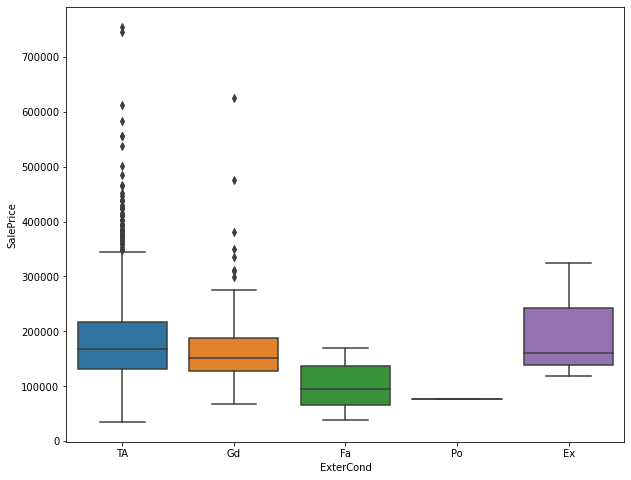


Foundation


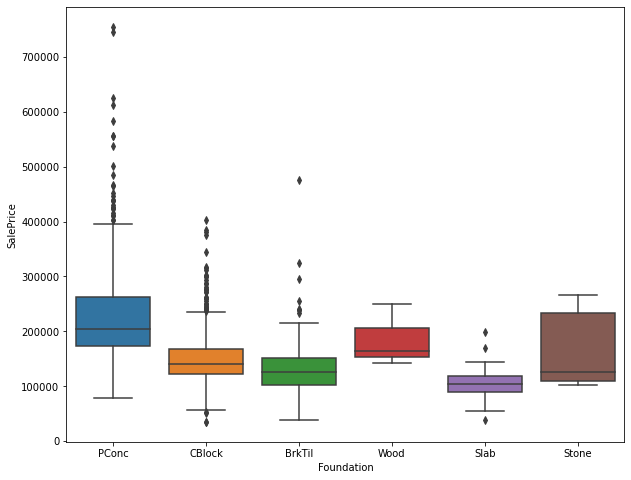


BsmtQual


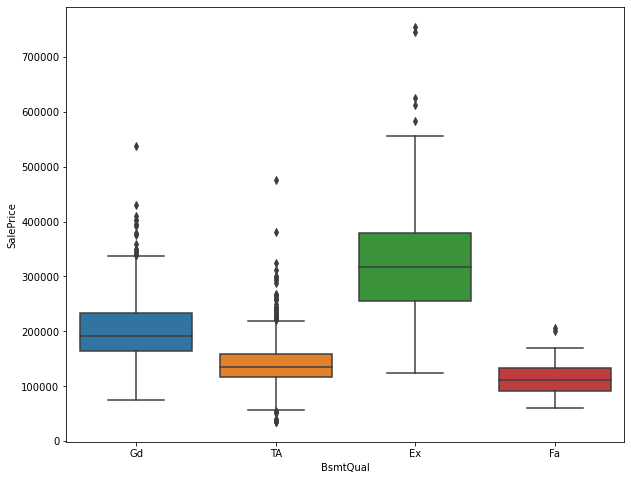


BsmtCond


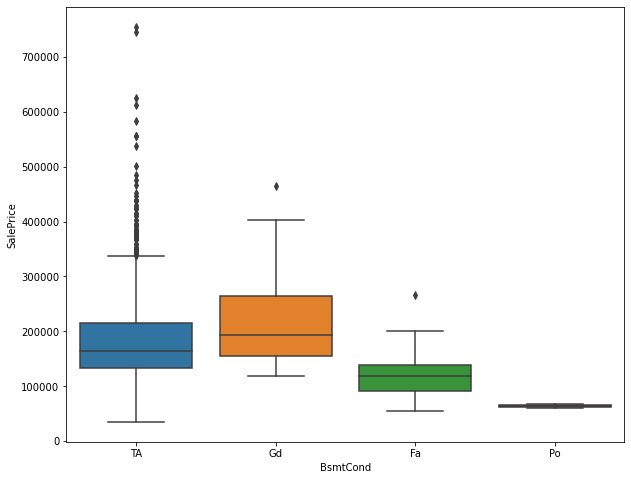


BsmtExposure


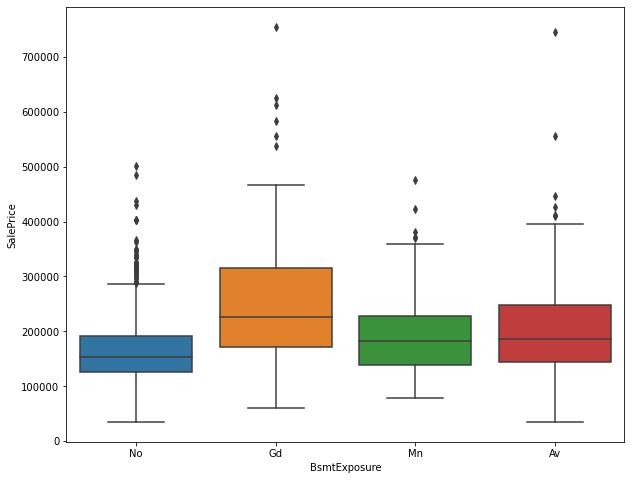


BsmtFinType1


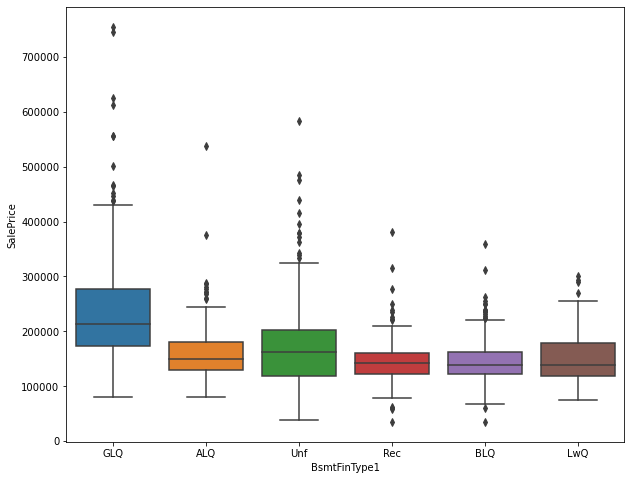


BsmtFinType2


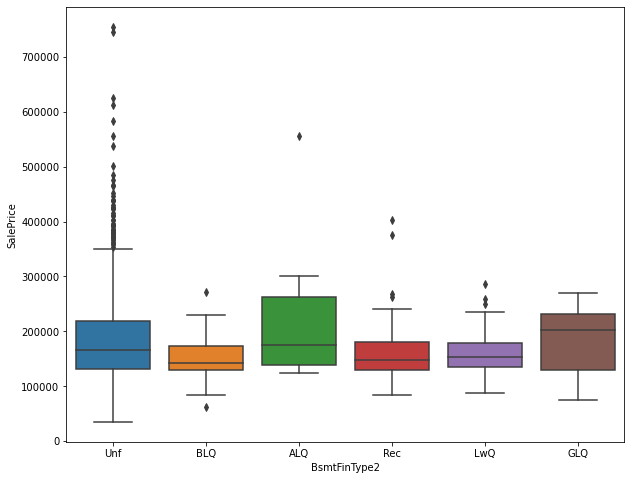


Heating


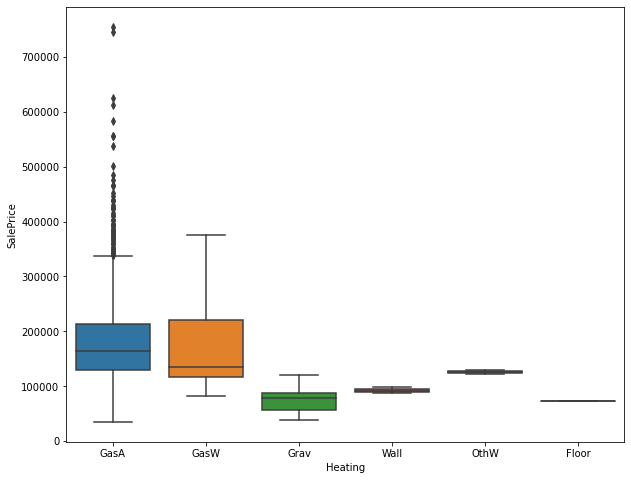


CentralAir


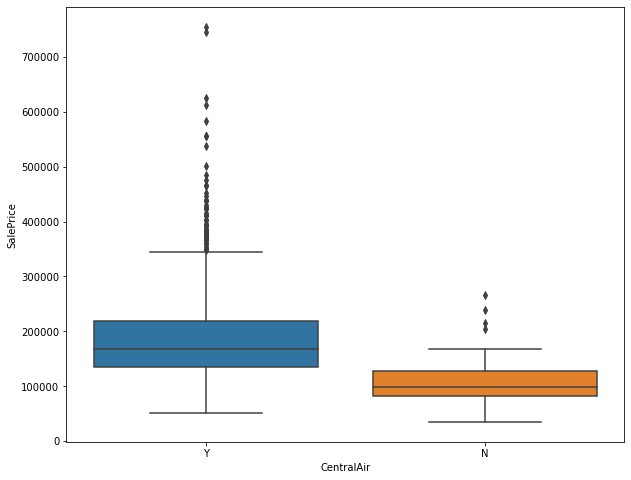


Electrical


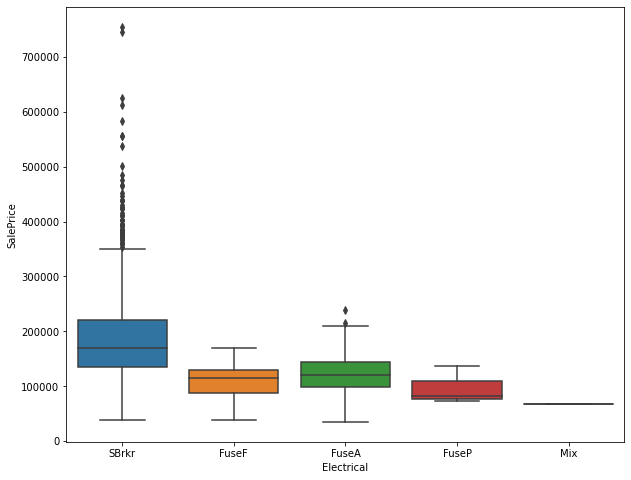


KitchenQual


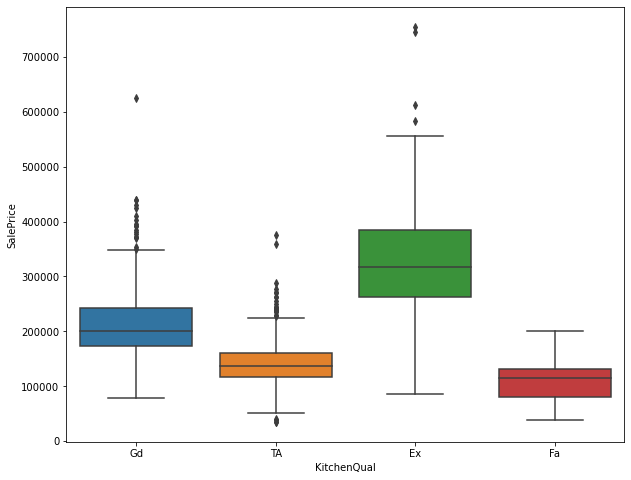


Functional


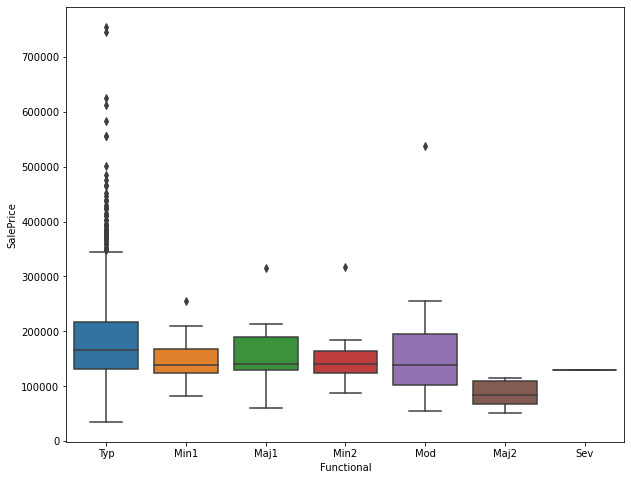


GarageType


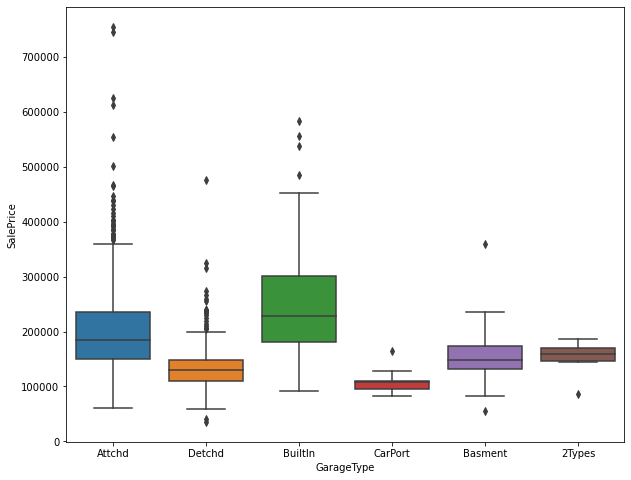


GarageFinish


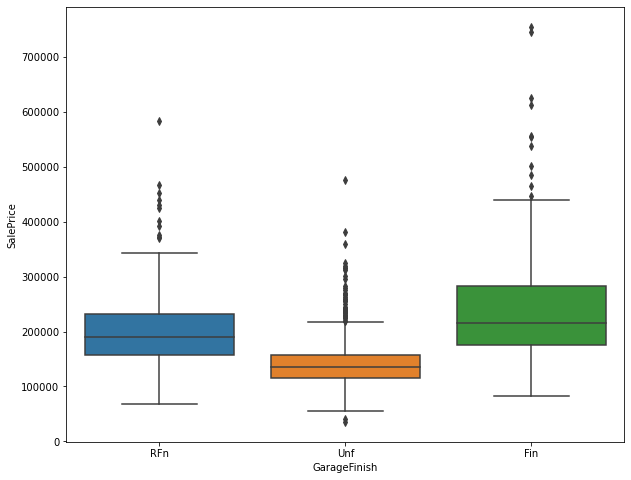


GarageCond


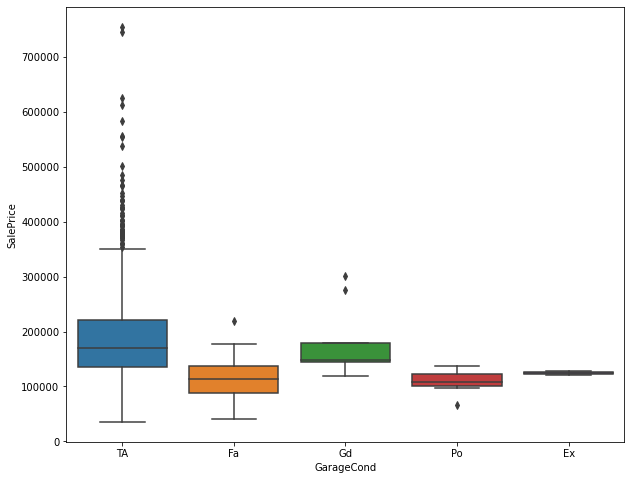


PavedDrive


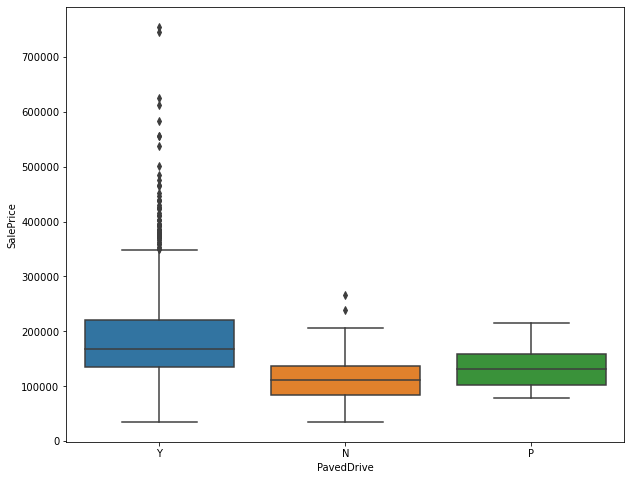


SaleType


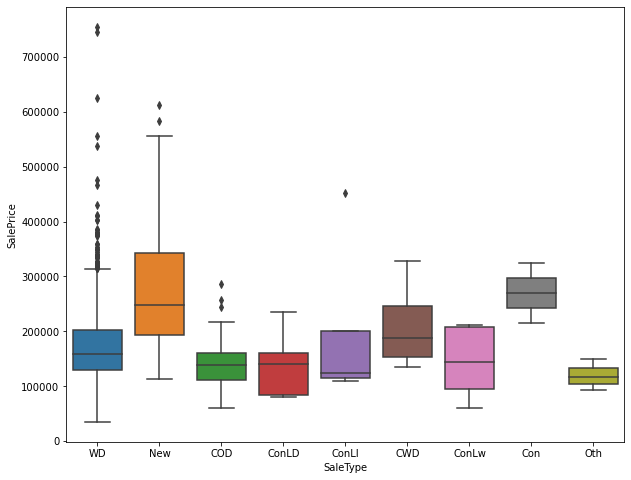


SaleCondition


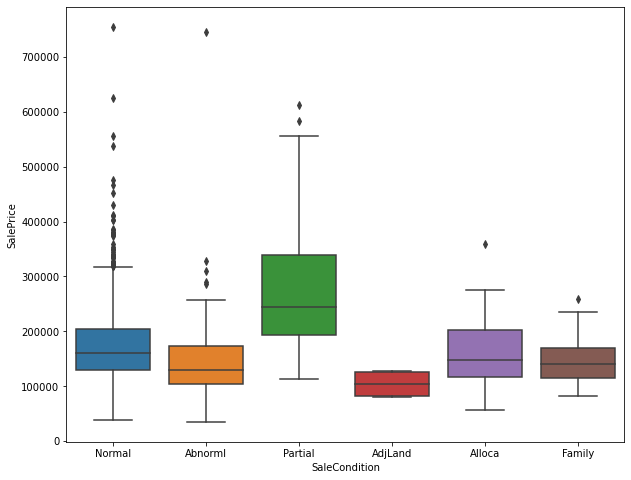


OverallQual


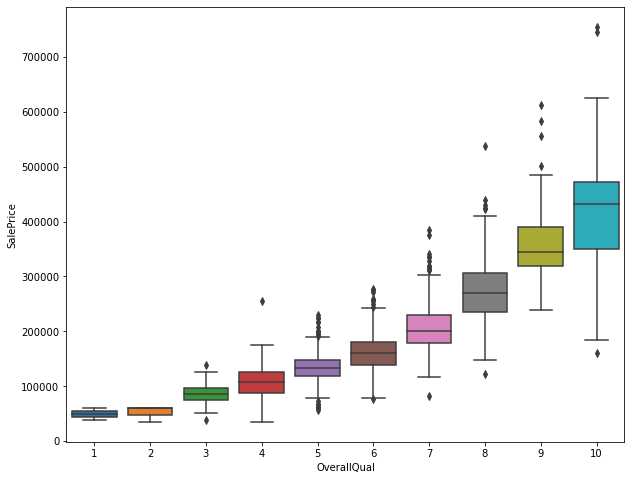

In [227]:
for feature in cat_features:
    print(feature)
    plt.figure(figsize = (10,8))
    sns.boxplot(y='SalePrice', x=feature, data=df)
    plt.show()
    print()
print();

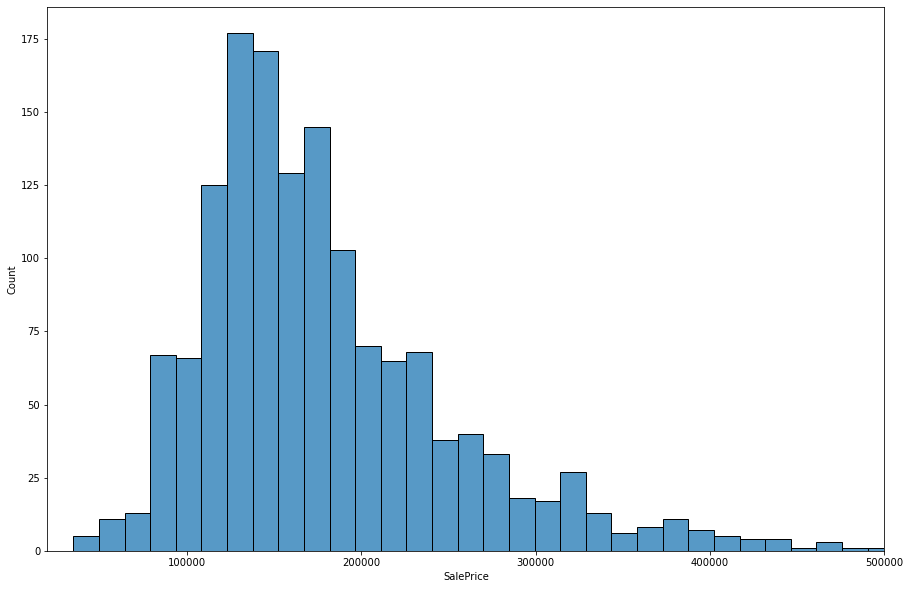

In [228]:
plt.figure(figsize = (15,10))
plt.xlim(20000,500000)
sns.histplot(df[df['train_test'] =='train']['SalePrice']);

In [229]:
quantil_99 = df['SalePrice'].quantile(.995)
quantil_01 = df['SalePrice'].quantile(.005)

df = df[(df['SalePrice'].isnull())|(df['SalePrice']>quantil_01) & (df['SalePrice']<quantil_99)]

MSZoning


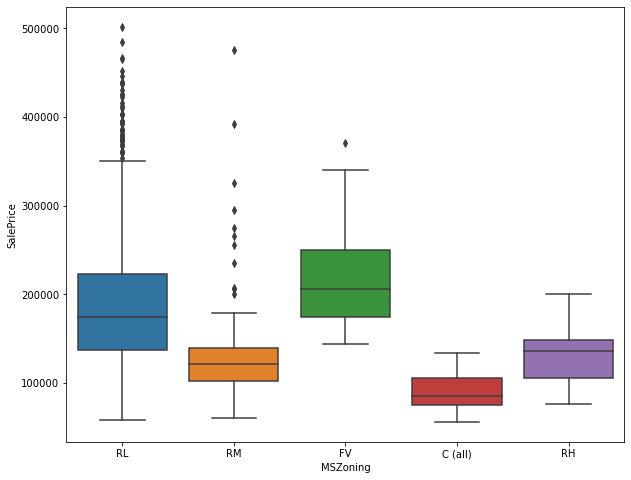


Alley


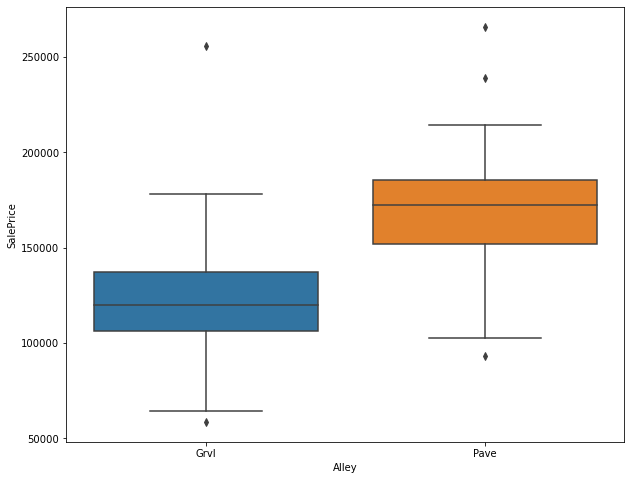


LotShape


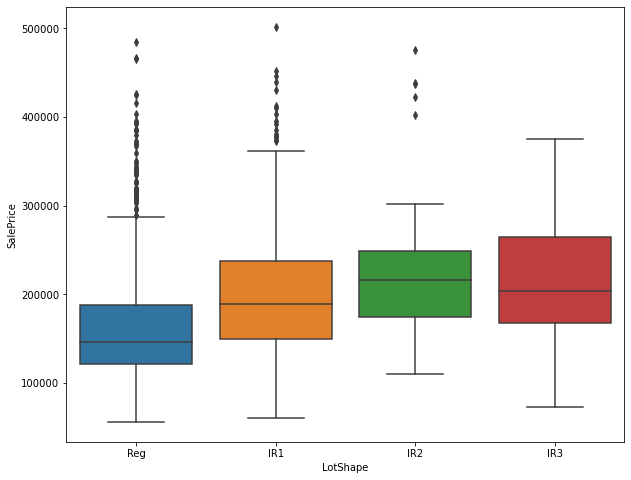


LandContour


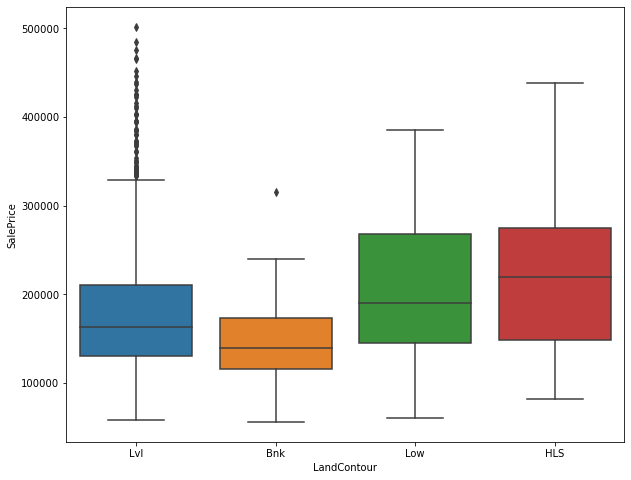


LotConfig


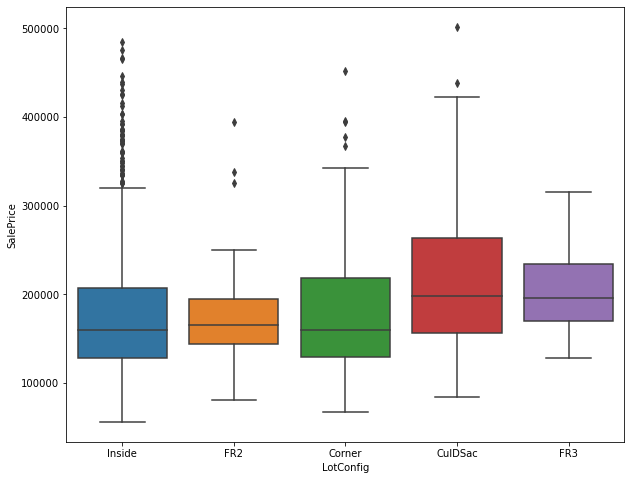


LandSlope


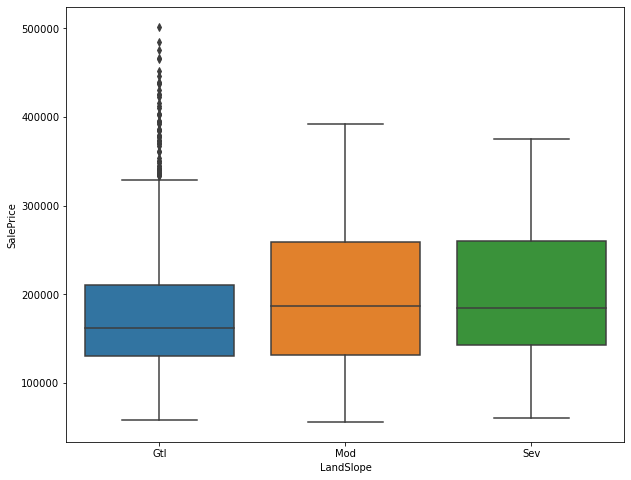


Neighborhood


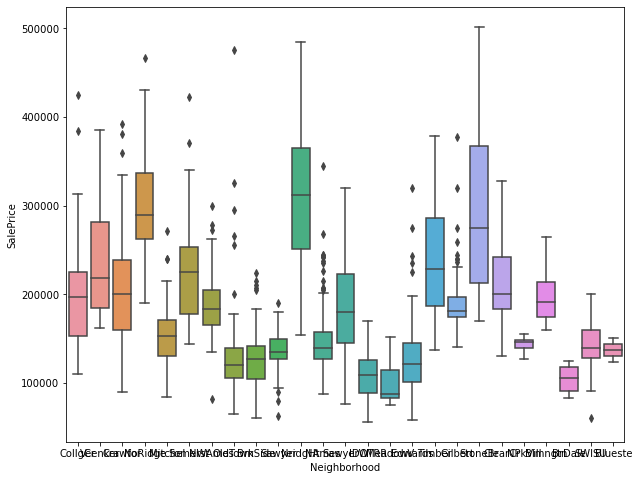


Condition1


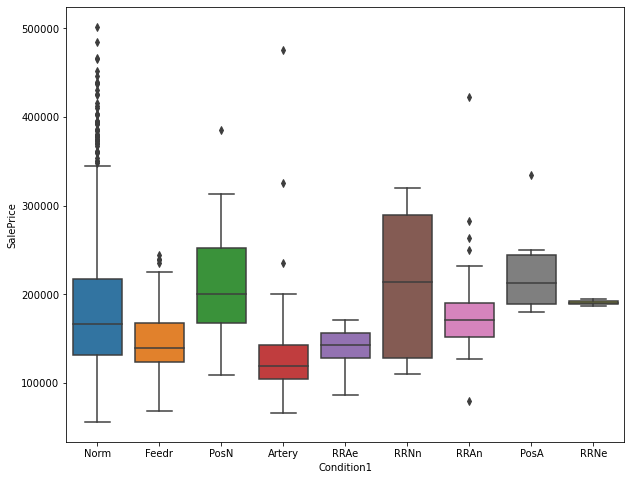


Condition2


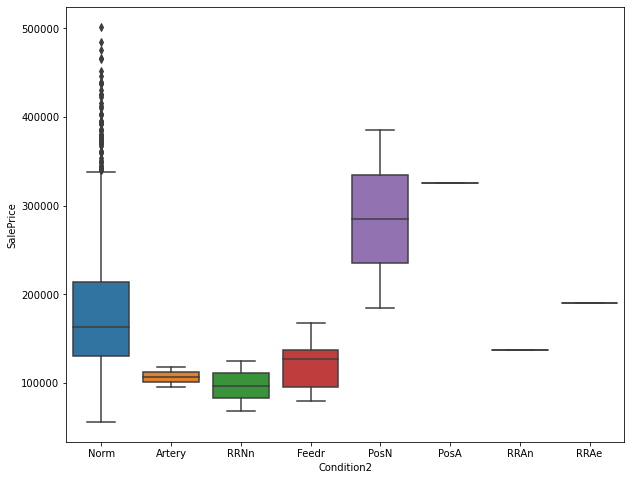


GarageQual


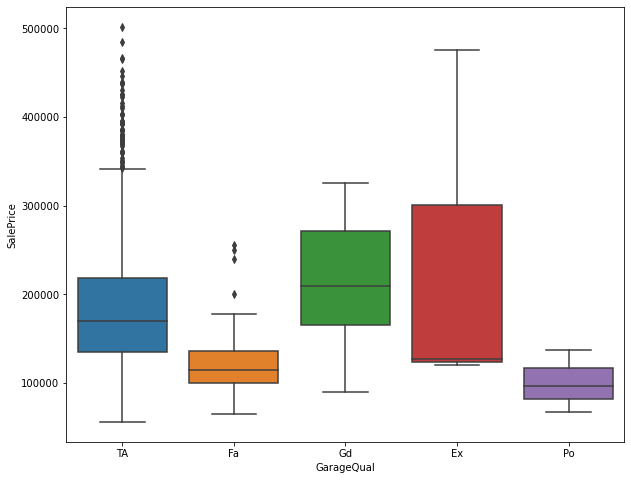


BldgType


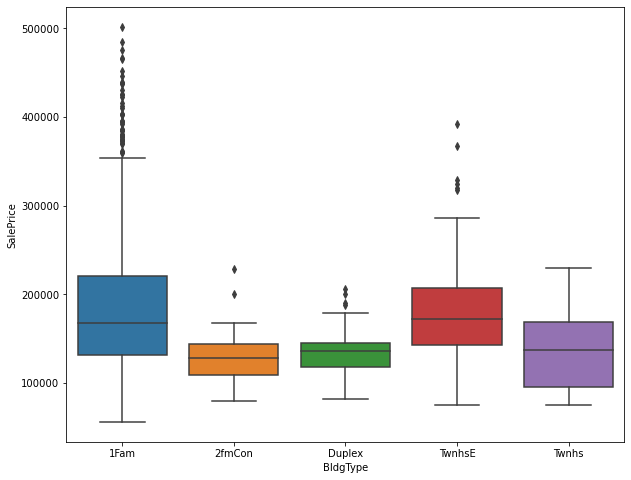


HouseStyle


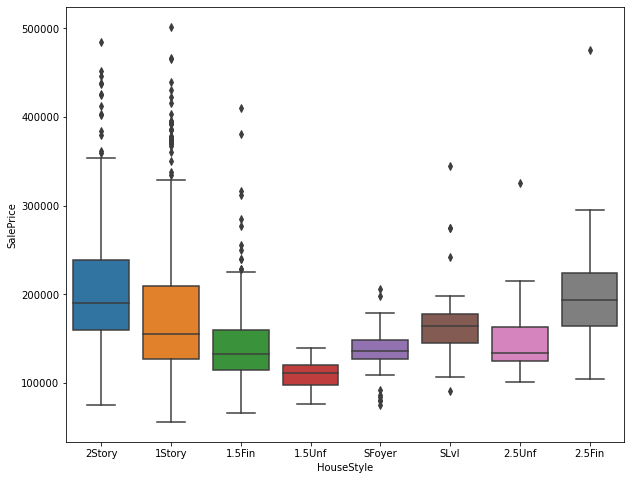


RoofStyle


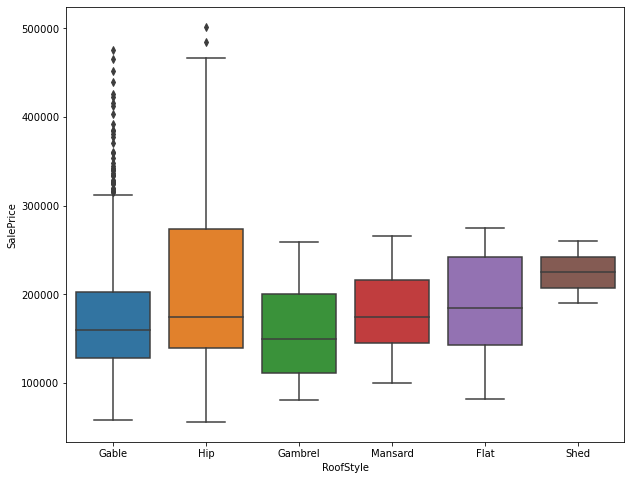


RoofMatl


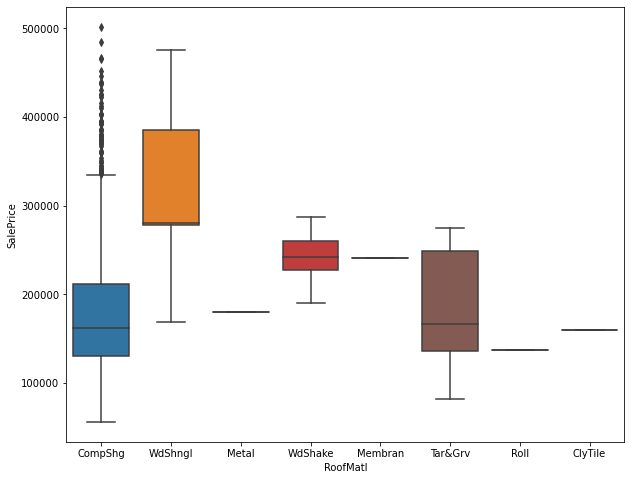


Exterior1st


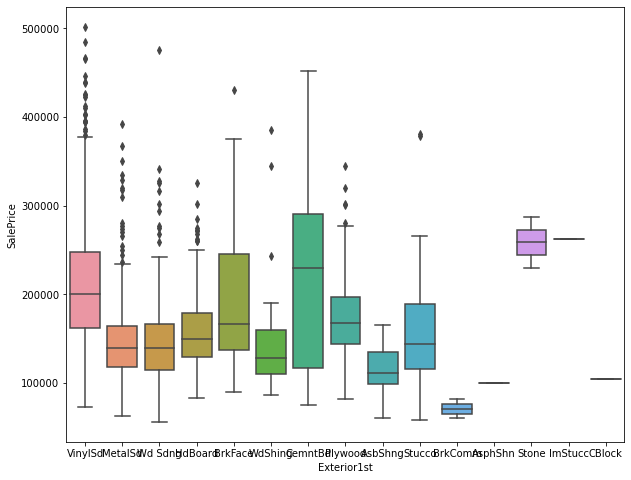


Exterior2nd


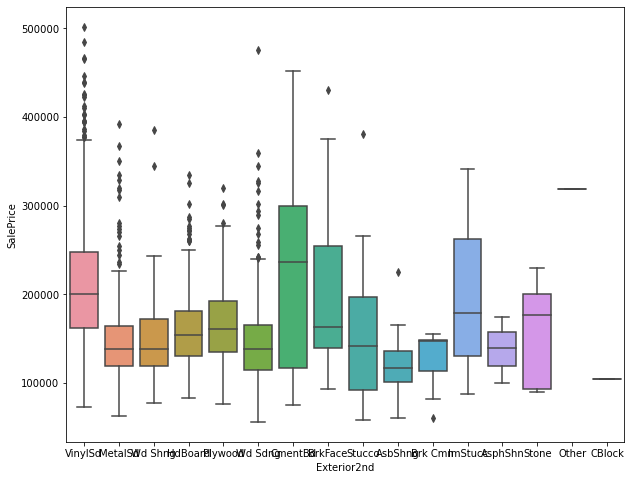


MasVnrType


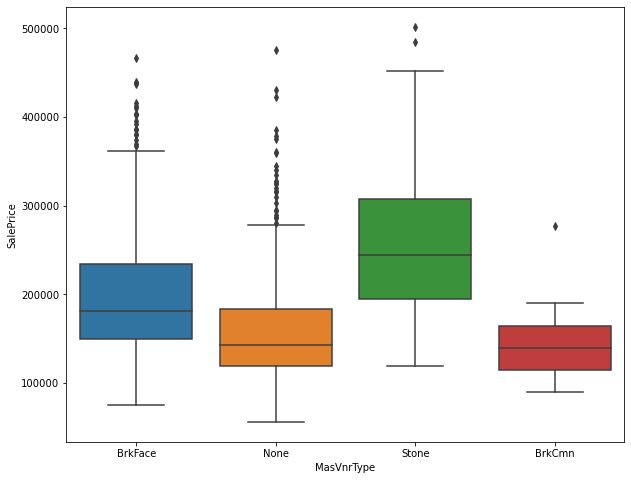


ExterQual


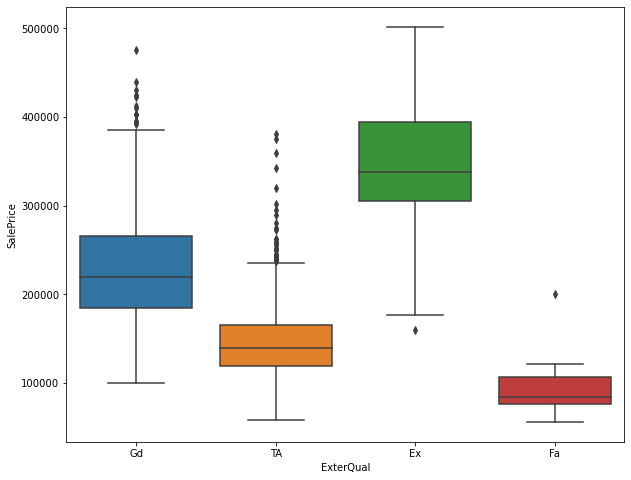


ExterCond


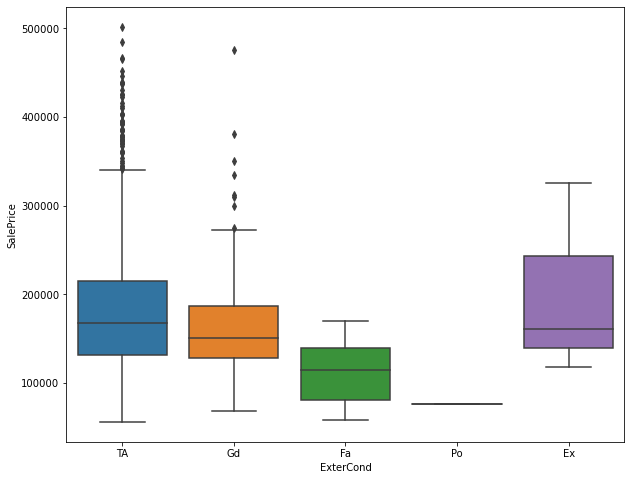


Foundation


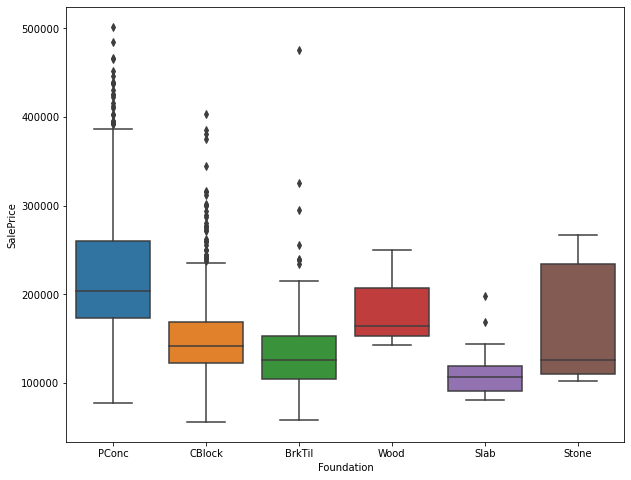


BsmtQual


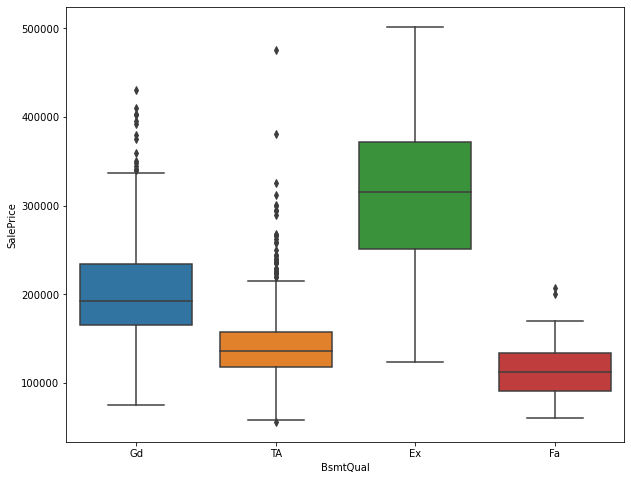


BsmtCond


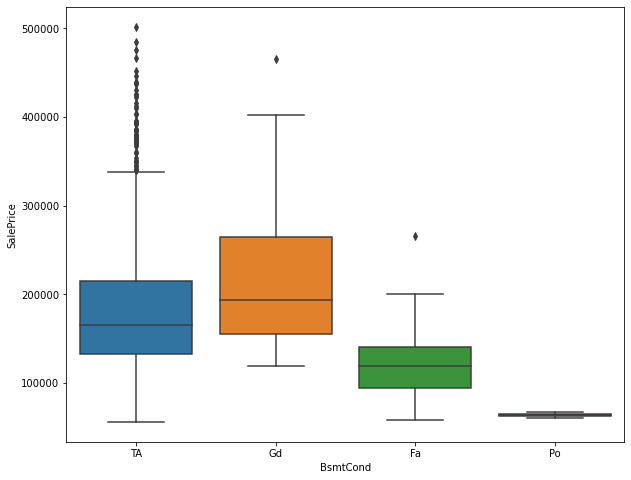


BsmtExposure


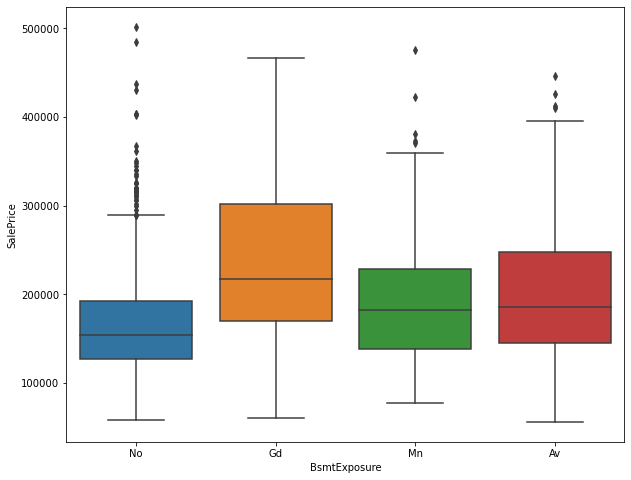


BsmtFinType1


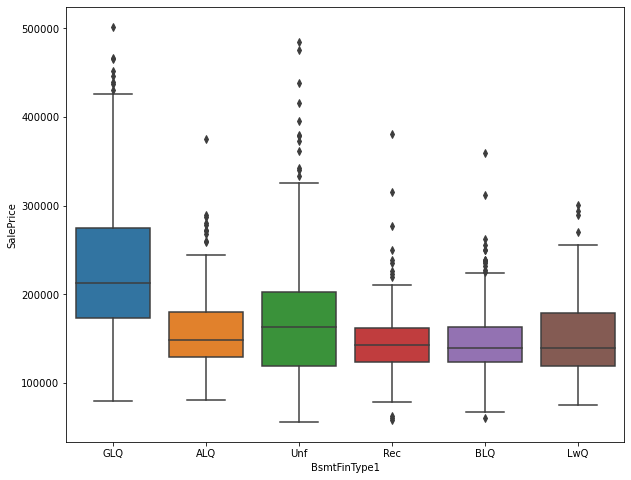


BsmtFinType2


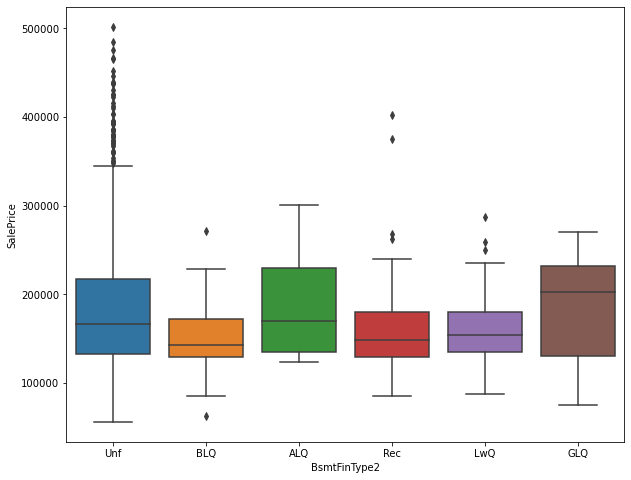


Heating


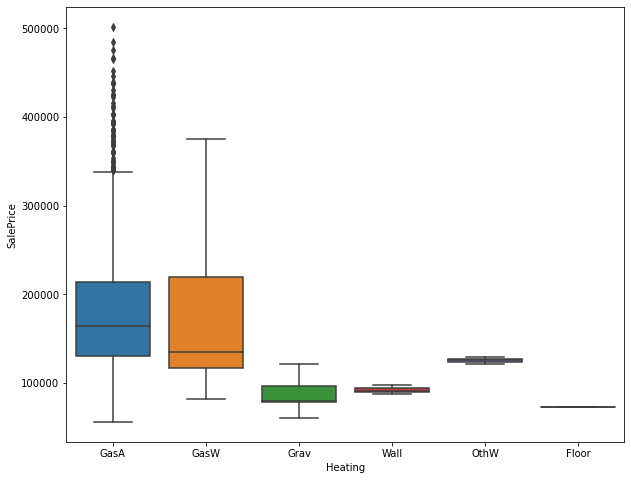


CentralAir


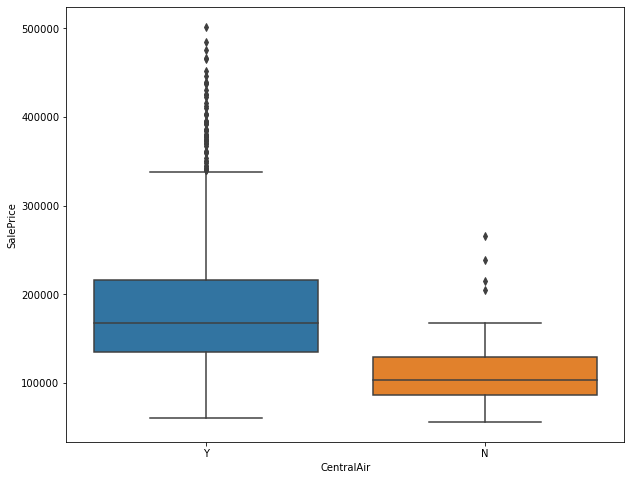


Electrical


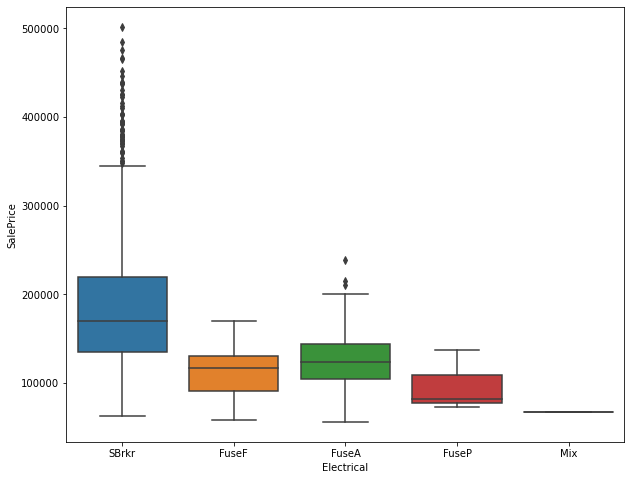


KitchenQual


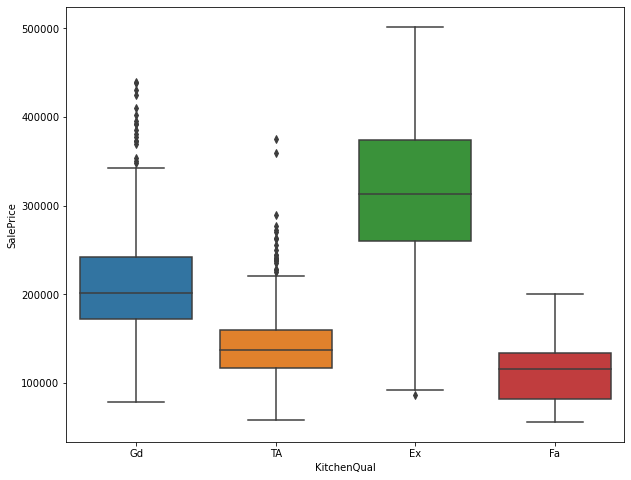


Functional


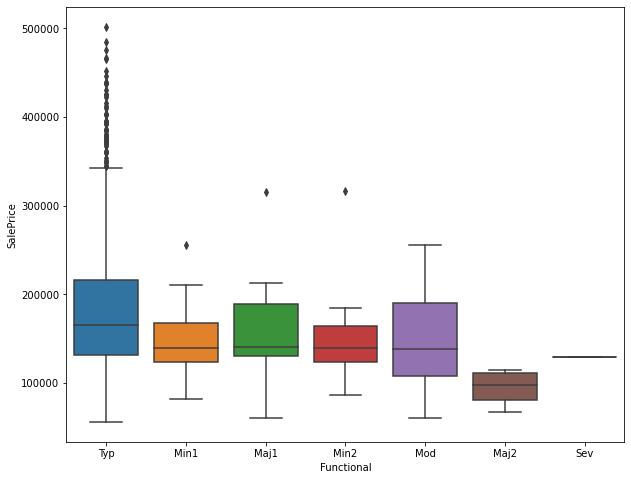


GarageType


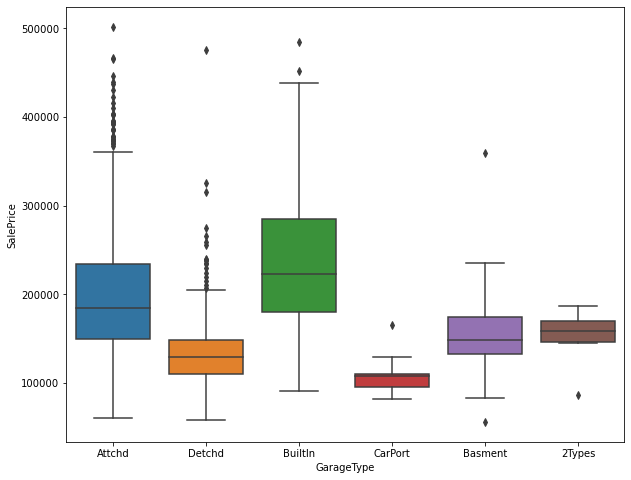


GarageFinish


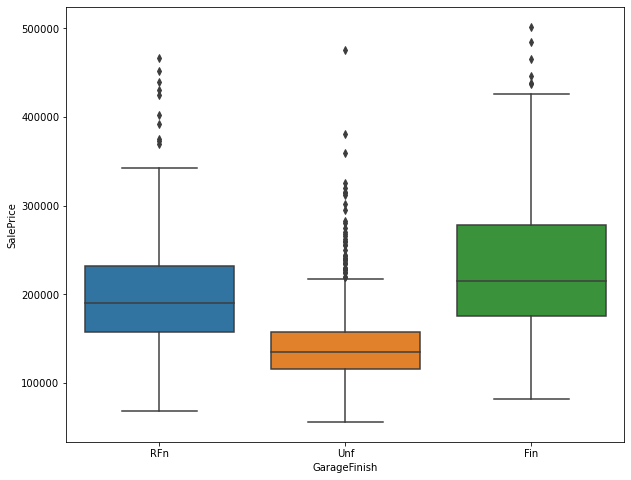


GarageCond


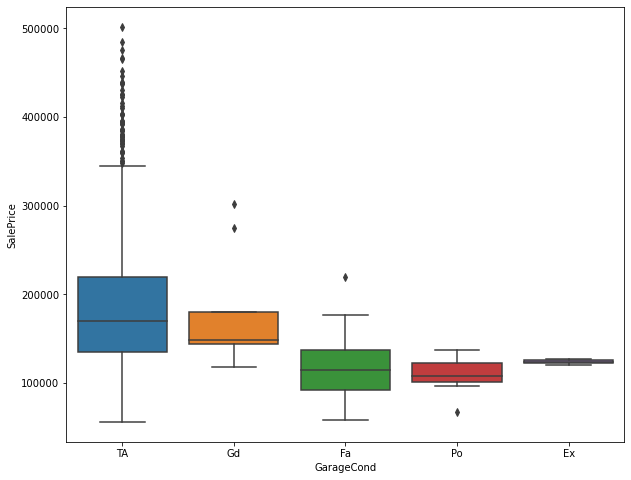


PavedDrive


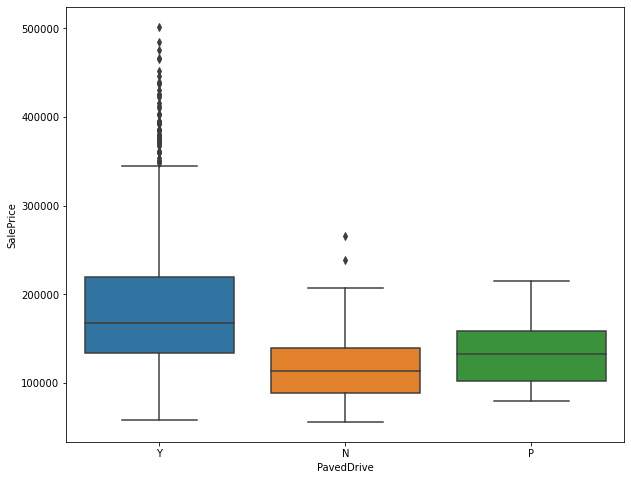


SaleType


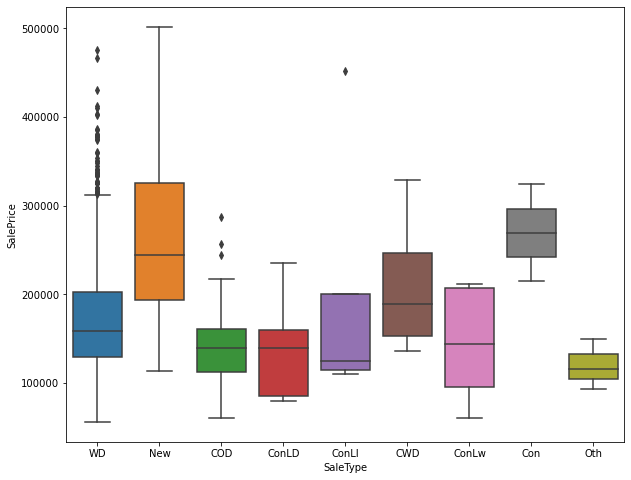


SaleCondition


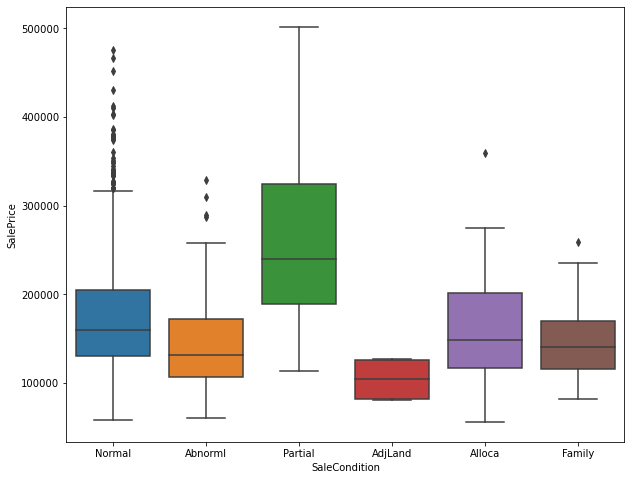


OverallQual


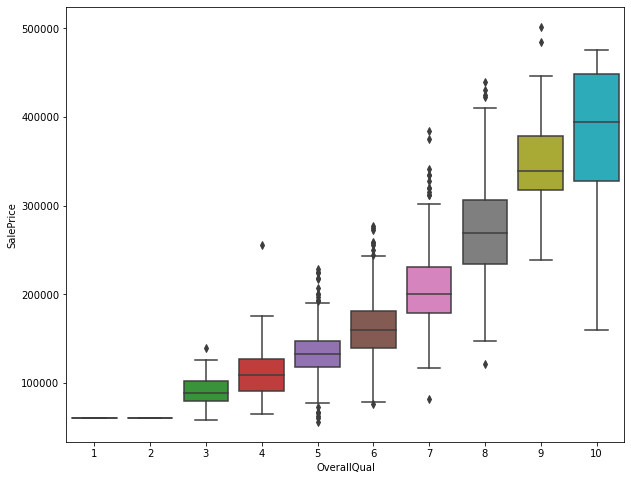

In [230]:
for feature in cat_features:
    print(feature)
    plt.figure(figsize = (10,8))
    sns.boxplot(y='SalePrice', x=feature, data=df)
    plt.show()
    print()
print();

In [231]:
df.groupby(['LandSlope']).std().round()[target]/df.groupby(['LandSlope']).mean().round()[target]
df[target].std()

71809.7509067295

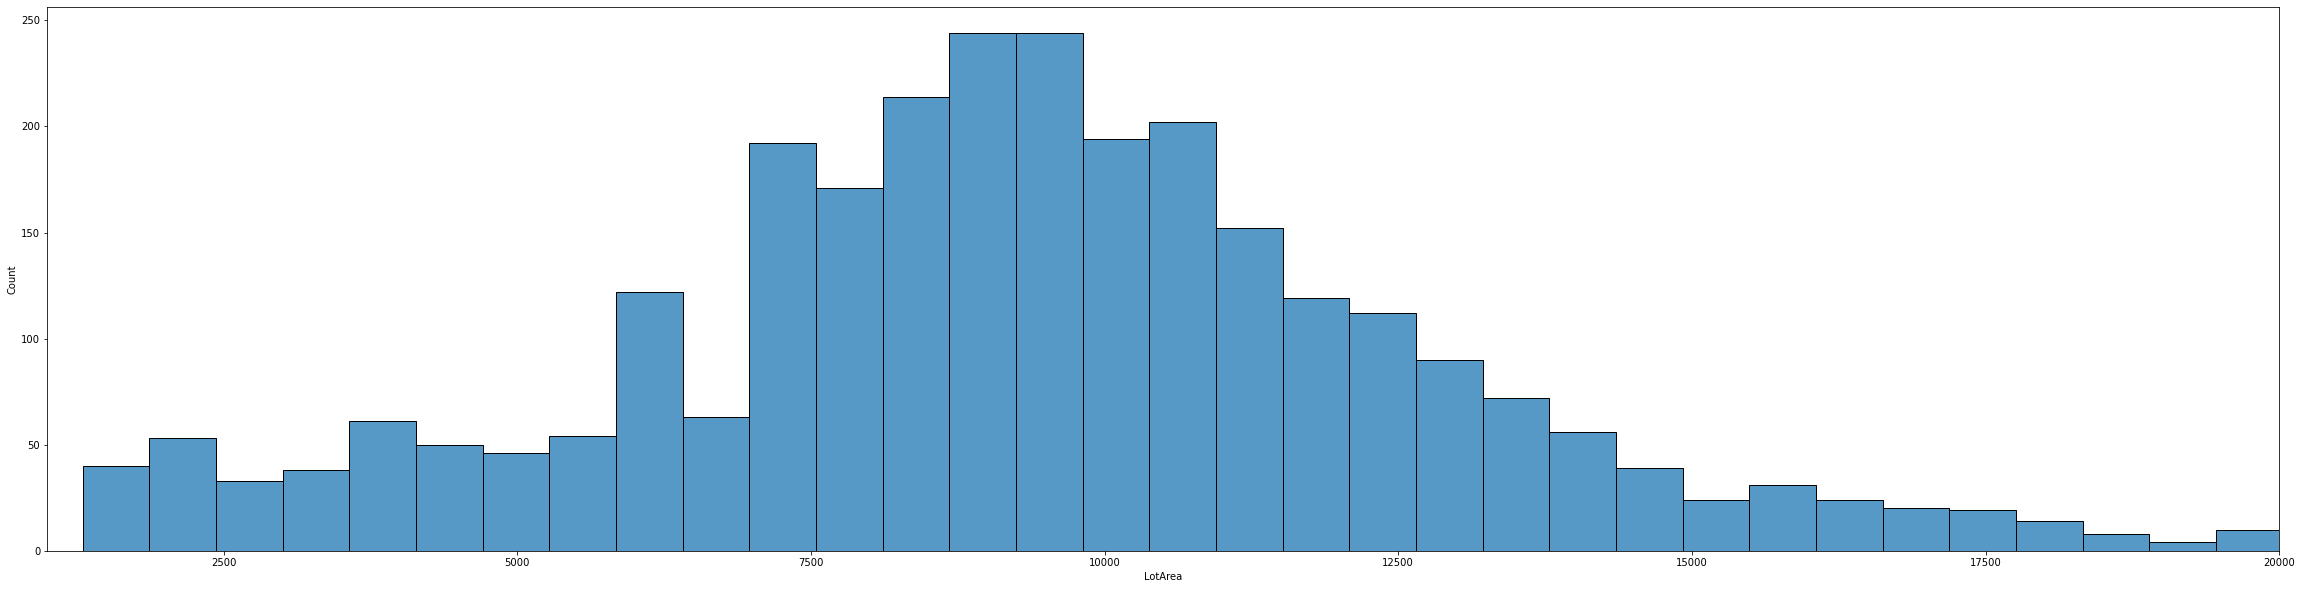

In [232]:
#Гистограмма площадей
plt.figure(figsize = (40,10))
plt.xlim(1000,20000)
sns.histplot(data = df, x = 'LotArea' );

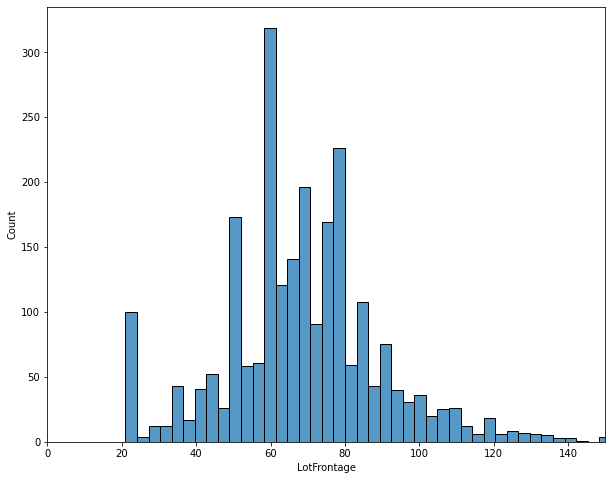

In [233]:
plt.figure(figsize = (10,8))
plt.xlim(0,150)
sns.histplot(df['LotFrontage']);

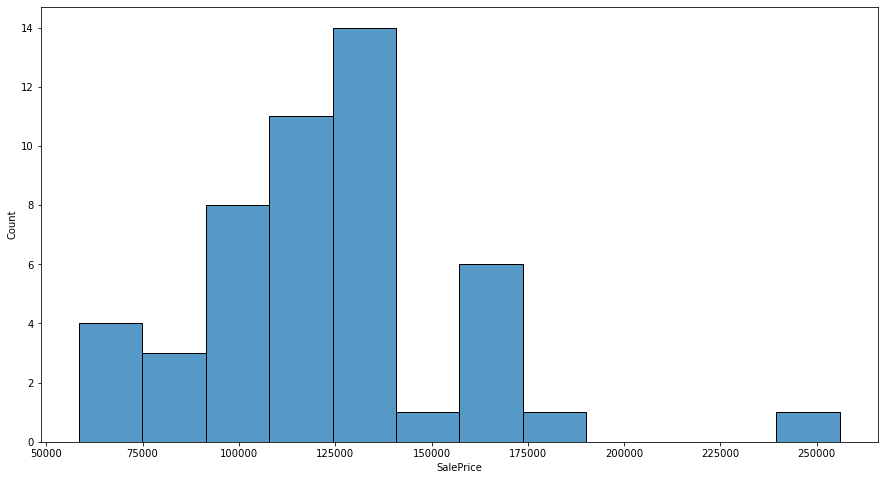

In [234]:
plt.figure(figsize = (15,8))
#plt.xlim(0,150)
sns.histplot(df[df['Alley']=='Grvl']['SalePrice']);

LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


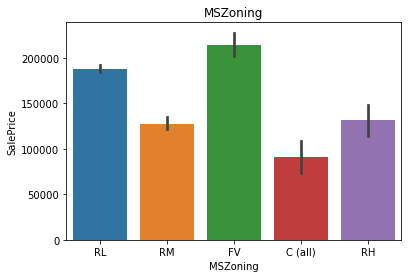


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


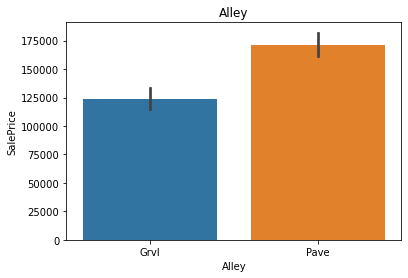


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


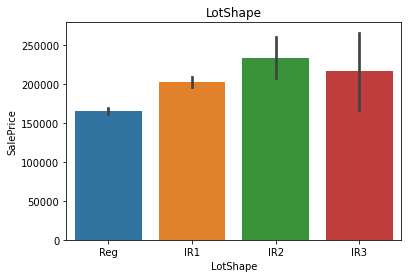


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


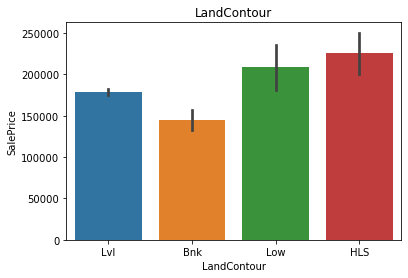


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


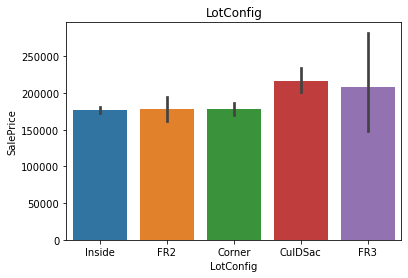


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


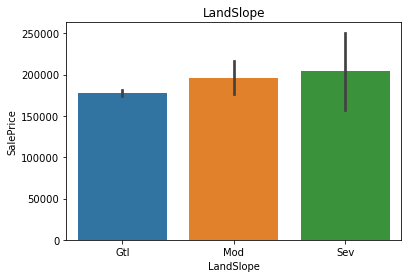


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


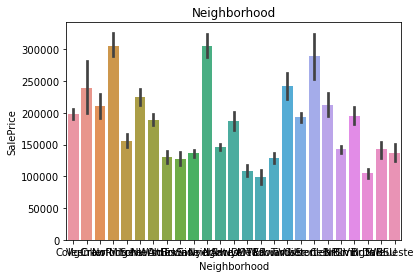


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


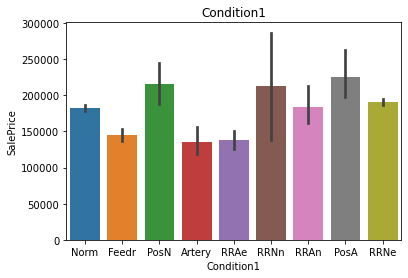


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


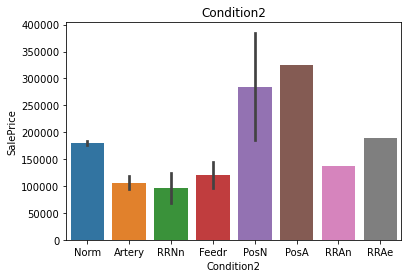


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


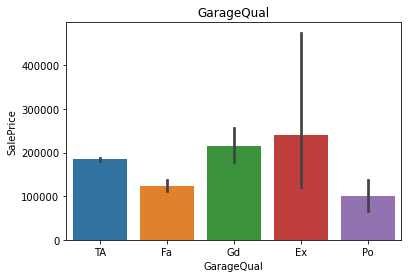


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


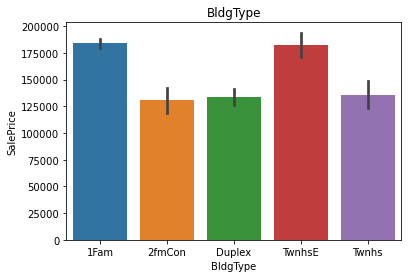


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


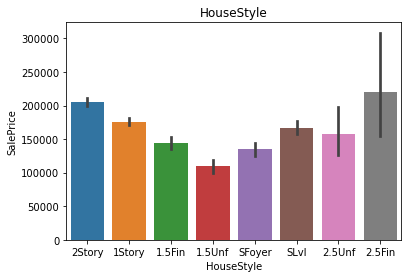


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


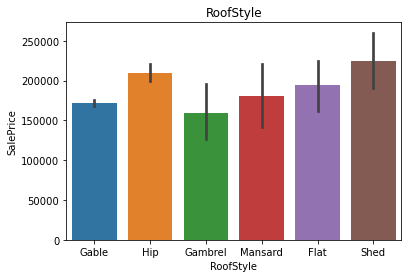


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


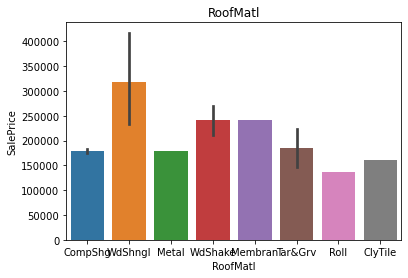


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


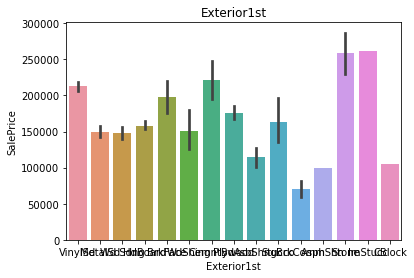


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


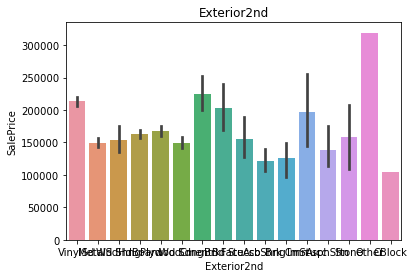


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


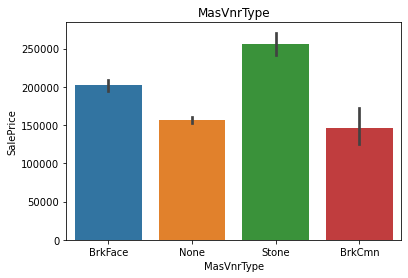


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


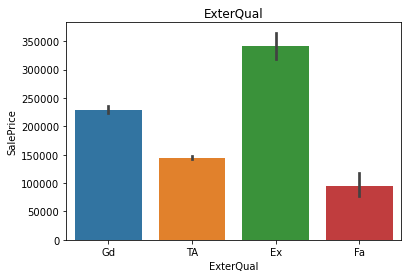


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


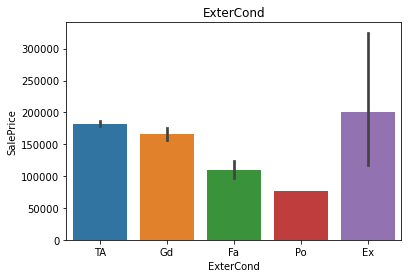


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


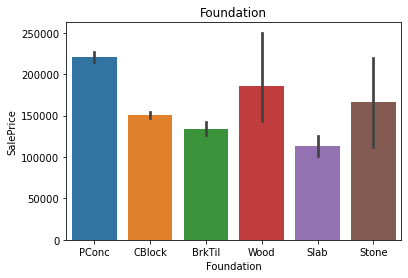


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


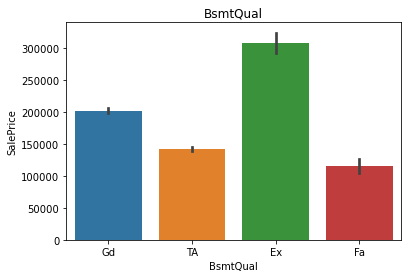


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


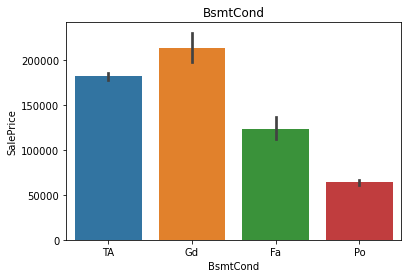


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


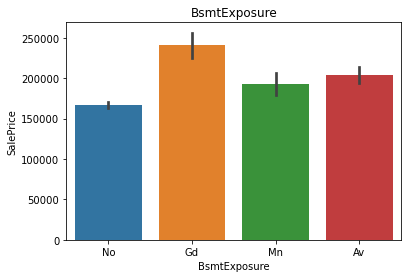


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


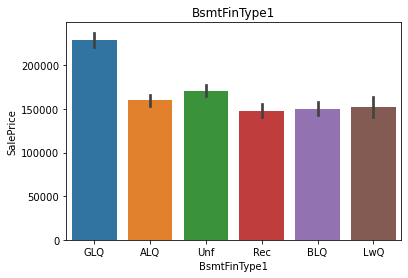


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


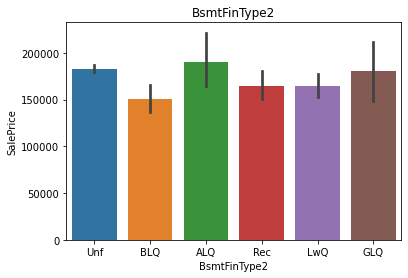


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


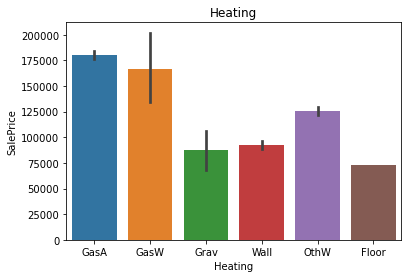


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


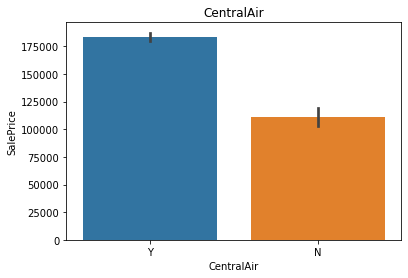


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


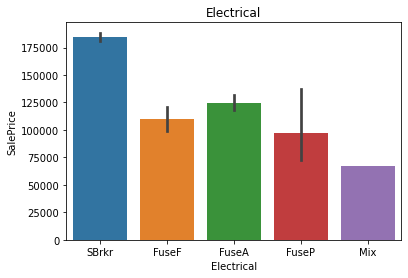


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


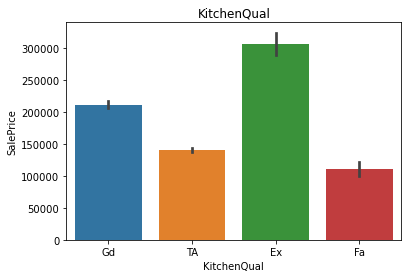


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


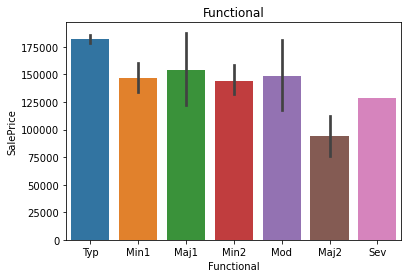


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


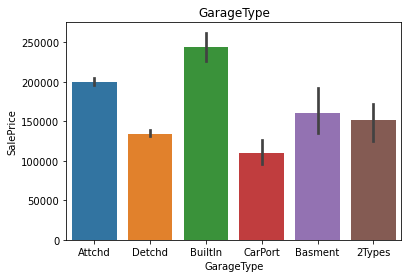


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


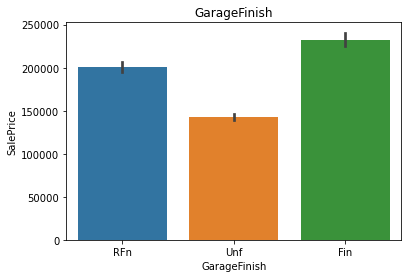


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


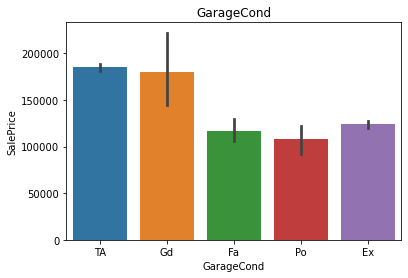


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


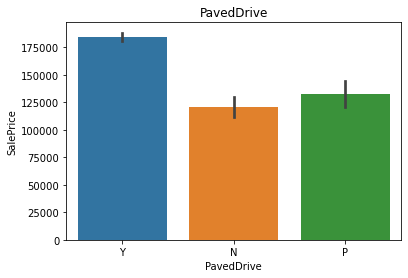


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


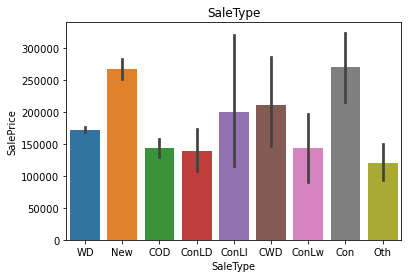


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


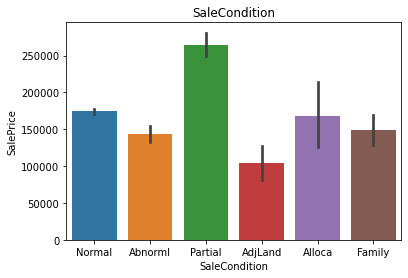


LandSlope
Gtl    0.40
Mod    0.40
Sev    0.42
Name: SalePrice, dtype: float64


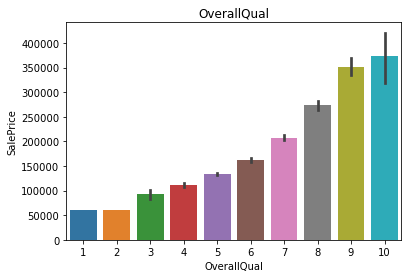

In [235]:
for feature in cat_features:
    plt.title(feature)
    print(((df.groupby(['LandSlope']).std()[target]/df.groupby(['LandSlope']).mean()[target])).round(2))
    sns.barplot(y=df[target], x=df[feature], data= df)
    plt.show()
    print()
print();


#ax = sns.barplot(x = 'day', y = 'tip', data = tips, ci=100)

# Замена Nan

In [236]:
#features
df.select_dtypes(include=['int64', 'float64']).isnull().sum()

MSSubClass          0
LotFrontage       486
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea         23
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt       152
GarageCars          1
GarageArea          1
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
dtype: int64

In [237]:
df[df['GarageYrBlt'].isnull()][['GarageYrBlt', 'GarageType']]


,GarageYrBlt,GarageType
Id,,
40,NaN,NaN
49,NaN,NaN
79,NaN,NaN
89,NaN,NaN
90,NaN,NaN
...,...,...
2894,NaN,NaN
2910,NaN,NaN
2914,NaN,NaN


In [238]:
#cat_features
df['GarageCars'] = df['GarageCars'].fillna(round(df[df['GarageType']=='Detchd']['GarageCars'].mean()))
df['GarageArea'] = df['GarageArea'].fillna(round(df[df['GarageType']=='Detchd']['GarageArea'].mean()))

df['Alley'].fillna('no_alley', inplace=True)
df['MSZoning'] = df['MSZoning'].fillna('RL')
df['Utilities'] = df['Utilities'].fillna('AllPub')
df['Exterior1st'] = df['Exterior1st'].fillna('VinylSd')
df['Exterior2nd'] = df['Exterior2nd'].fillna('VinylSd')
df['MasVnrType'].fillna('no_inform', inplace=True)
df['Electrical'] = df['Electrical'].fillna('SBrkr')
df['KitchenQual'] = df['KitchenQual'].fillna('no_inform')
df['Functional'] = df['Functional'].fillna('Typ')
df['SaleType'] = df['SaleType'].fillna('WD')
df['BsmtQual'] = df['BsmtQual'].fillna('no_basement')
df['BsmtCond'] = df['BsmtCond'].fillna('no_basement')
df['BsmtExposure'] = df['BsmtExposure'].fillna('no_basement')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('no_basement')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('no_basement')
df['FireplaceQu'] = df['FireplaceQu'].fillna('no_fireplace')
df['GarageType'] = df['GarageType'].fillna('no_garage')
df['GarageFinish'] = df['GarageFinish'].fillna('no_garage')
df['GarageQual'] = df['GarageQual'].fillna('no_garage')
df['GarageCond'] = df['GarageCond'].fillna('no_garage')
df['GarageCond'] = df['GarageCond'].fillna('no_garage')
df['PoolQC'] = df['PoolQC'].fillna('no_pool')
df['Fence'] = df['Fence'].fillna('no_fence')
df['MiscFeature'] = df['MiscFeature'].fillna('no_feature')


In [239]:
df.groupby('GarageType')['GarageYrBlt'].mean()

GarageType
2Types       1964.695652
Attchd       1984.300931
Basment      1963.138889
BuiltIn      1996.994536
CarPort      1958.066667
Detchd       1961.270968
no_garage            NaN
Name: GarageYrBlt, dtype: float64

In [240]:
#features
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(round(df['BsmtFinSF1'].mean()))
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(round(df['BsmtFinSF2'].mean()))
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(round(df['BsmtUnfSF'].mean()))
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(round(df['TotalBsmtSF'].mean()))
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)

df['GarageYrBlt']=df['GarageYrBlt'].fillna(df.groupby('GarageType')['GarageYrBlt'].transform('mean'))

df['GarageYrBlt']=df['GarageYrBlt'].fillna(round(df['BsmtFinSF1'].mean()))
df['MasVnrArea'] = df['MasVnrArea'].fillna(round(df['MasVnrArea'].mean()))
#df['LotFrontage'] = df['LotFrontage'].fillna(df.groupby('Alley')['LotFrontage'].transform('mean'))
df['LotFrontage'] = df['LotFrontage'].fillna(df['TotalBsmtSF'].mean())

In [241]:
#Для исследования

#df[df['Utilities '].isnull()]['BldgType'].value_counts()
#df['KitchenQual'].value_counts()
#df['Age_fill'] = df.apply(lambda row: mean_age.loc[(row['Sex'], row['Pclass'])], axis=1)
#df[df['SaleType'].isnull()]
#df['MiscFeature'].value_counts()
#df.groupby(['KitchenAbvGr','KitchenQual'])['KitchenAbvGr'].count()

#mean_age = df.groupby(['Sex', 'Pclass'])['Age'].median().round()

## check

In [242]:
df[df['LotFrontage'].isnull()][['LotFrontage']]
df['GarageYrBlt'].iloc[7:13]
#df['GarageType'].isnull().sum()
df['GarageYrBlt'].isnull().sum()

0

In [243]:
#features
df.select_dtypes(include=['int64', 'float64']).isnull().sum()

MSSubClass          0
LotFrontage         0
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt         0
GarageCars          0
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
dtype: int64

In [244]:
#cat_features
df.select_dtypes(include=['object']).isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
train_test       0
dtype: int64

# OneHotEncoding

In [245]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

onehot_encoder.fit(df[cat_features])
cat_enc_cols = [f'{c}_{el}' for arr, c in zip(onehot_encoder.categories_, cat_features) for el in arr]

one_frame =  pd.DataFrame(onehot_encoder.transform(df[cat_features]),
                          columns=cat_enc_cols, index = df.index)
one_frame.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_Pave,Alley_no_alley,LotShape_IR1,LotShape_IR2,...,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10
Id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [246]:
df_all=[]
df_all = df.drop(cat_features, axis = 1).copy()
df_all = df_all.drop(features_drop, axis = 1).copy()

In [247]:
df_all = pd.merge(df_all,one_frame, on = 'Id')

In [248]:
df_all

,LotFrontage,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,2003,2003,196.0,706.0,150.0,856.0,856,854,1710,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,80.0,1976,1976,0.0,978.0,284.0,1262.0,1262,0,1262,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,68.0,2001,2002,162.0,486.0,434.0,920.0,920,866,1786,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,60.0,1915,1970,0.0,216.0,540.0,756.0,961,756,1717,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,84.0,2000,2000,350.0,655.0,490.0,1145.0,1145,1053,2198,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,21.0,1970,1970,0.0,0.0,546.0,546.0,546,546,1092,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2916,21.0,1970,1970,0.0,252.0,294.0,546.0,546,546,1092,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2917,160.0,1960,1996,0.0,1224.0,0.0,1224.0,1224,0,1224,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

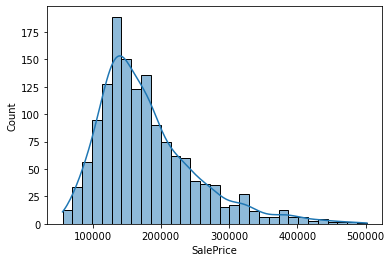

In [249]:
sns.histplot(df['SalePrice'], kde = True)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

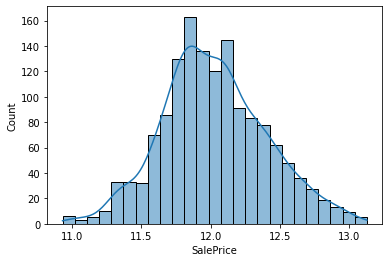

In [250]:
sns.histplot(np.log(df['SalePrice']), kde = True)

# to_csv

In [251]:
df_all

,LotFrontage,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,2003,2003,196.0,706.0,150.0,856.0,856,854,1710,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,80.0,1976,1976,0.0,978.0,284.0,1262.0,1262,0,1262,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,68.0,2001,2002,162.0,486.0,434.0,920.0,920,866,1786,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,60.0,1915,1970,0.0,216.0,540.0,756.0,961,756,1717,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,84.0,2000,2000,350.0,655.0,490.0,1145.0,1145,1053,2198,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,21.0,1970,1970,0.0,0.0,546.0,546.0,546,546,1092,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2916,21.0,1970,1970,0.0,252.0,294.0,546.0,546,546,1092,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2917,160.0,1960,1996,0.0,1224.0,0.0,1224.0,1224,0,1224,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [252]:
df_all.to_csv('df_clear_new_2305_05%.csv')

# ToDoList

knn imputer
выкинуть категориальные фичи
catboosting